## Video Game Sales Analysis

Author: Nat Berryman

In [1]:
# importing the packages we will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import rcParams
import seaborn as sns
import seaborn as sb
sb.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
import sklearn
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn import linear_model
from statsmodels.formula.api import ols
import sklearn.metrics as metrics

from scipy import stats 
import math

import pylab

%matplotlib inline

Next steps are to load the dataset and ensuring any inifinty values are loaded as Null Values.
After loading the datasets it was important to look at what we are working with and ensure all variables are the correct datatype.

In [2]:
vg_sales = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
pd.set_option('use_inf_as_na', True)

In [4]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [6]:
vg_sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


The outliers were removed using the empirical formula to assist with accurate modelling.

In [7]:
std = vg_sales.Global_Sales.std()
print('std: ',std)
mean = vg_sales.Global_Sales.mean()
print('mean: ', mean)
std_2 = mean + 2*std
std_2m = mean - 2*std
print('mean +2 std: ',std_2)
print('mean -2 std: ',std_2m)

std:  1.5479351247177218
mean:  0.5335426759974459
mean +2 std:  3.6294129254328893
mean -2 std:  -2.5623275734379978


In [8]:
vg_sales = vg_sales.loc[(vg_sales['Global_Sales']<std_2) & (vg_sales['Global_Sales']>std_2m)]
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16369 entries, 350 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16367 non-null  object 
 1   Platform         16369 non-null  object 
 2   Year_of_Release  16101 non-null  float64
 3   Genre            16367 non-null  object 
 4   Publisher        16315 non-null  object 
 5   NA_Sales         16369 non-null  float64
 6   EU_Sales         16369 non-null  float64
 7   JP_Sales         16369 non-null  float64
 8   Other_Sales      16369 non-null  float64
 9   Global_Sales     16369 non-null  float64
 10  Critic_Score     7896 non-null   float64
 11  Critic_Count     7896 non-null   float64
 12  User_Score       7347 non-null   float64
 13  User_Count       7347 non-null   float64
 14  Developer        9850 non-null   object 
 15  Rating           9704 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.1+ MB


After viewing all columns I decided to drop any values that were not necessary in determining outcomes. 
I also addressed multicollinearity by removing the NA Sales, EU Sales, JP Sales and Other Sales.

As there was publisher variable, I removed developer.

I also wanted to get an overview of the each year release and determined it was ok to only included sales from 2000-2016.

In [9]:
drop_cols = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Developer', 'Rating']

vg_sales.drop(drop_cols, axis=1, inplace=True)

In [10]:
vg_sales

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
350,PS2,2005.0,Action,Capcom,3.62,96.0,38.0,8.9,1013.0
351,Wii,2008.0,Misc,Activision,3.62,86.0,18.0,7.6,71.0
352,PS3,2009.0,Sports,Electronic Arts,3.62,91.0,56.0,7.6,203.0
353,PS2,2004.0,Shooter,LucasArts,3.61,82.0,36.0,8.7,142.0
354,PC,1994.0,Shooter,Virgin Interactive,3.61,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN,NaN,NaN


In [11]:
vg_sales.groupby(['Year_of_Release']).count()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,,,,,,,,
1980.0,8,8,8,8,0,0,0,0
1981.0,45,45,45,45,0,0,0,0
1982.0,35,35,35,35,0,0,0,0
1983.0,17,17,17,17,0,0,0,0
1984.0,11,11,11,11,0,0,0,0
1985.0,13,13,13,13,1,1,1,1
1986.0,20,20,20,20,0,0,0,0
1987.0,15,15,15,15,0,0,0,0
1988.0,11,11,11,11,1,1,1,1


In [12]:
vg_sales = vg_sales[vg_sales['Year_of_Release']>=2000.00]
vg_sales = vg_sales[vg_sales['Year_of_Release']<=2016.00]
vg_sales.groupby(['Year_of_Release']).count()

,Platform,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Year_of_Release,,,,,,,,
2000.0,343,343,343,343,138,138,102,102
2001.0,468,468,468,468,313,313,244,244
2002.0,817,817,817,817,616,616,453,453
2003.0,767,767,767,767,580,580,511,511
2004.0,749,749,730,749,550,550,478,478
2005.0,923,923,918,923,641,641,569,569
2006.0,989,989,989,989,605,605,537,537
2007.0,1165,1165,1164,1165,663,663,600,600
2008.0,1410,1410,1410,1410,699,699,645,645


In [13]:
df_year = vg_sales.groupby(['Year_of_Release'])[['Platform']].count()
df_year.head(17)

,Platform
Year_of_Release,
2000.0,343
2001.0,468
2002.0,817
2003.0,767
2004.0,749
2005.0,923
2006.0,989
2007.0,1165
2008.0,1410


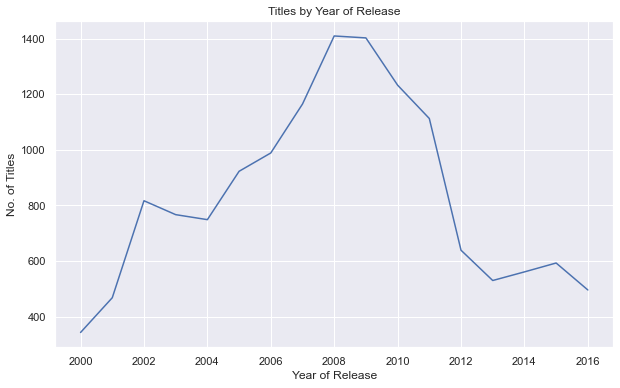

In [14]:
rcParams['figure.figsize'] = 10,6
plt.plot(df_year)
plt.grid(True)
plt.title('Titles by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('No. of Titles')
plt.show()

In [15]:
df_yearsales = vg_sales.groupby(['Year_of_Release'])[['Global_Sales']].count()
df_yearsales.head(17)

,Global_Sales
Year_of_Release,
2000.0,343
2001.0,468
2002.0,817
2003.0,767
2004.0,749
2005.0,923
2006.0,989
2007.0,1165
2008.0,1410


Once I cleaned the data I wanted an idea on trends of sales from each year, genre and publisher to get an idea of what features may be best to focus on.

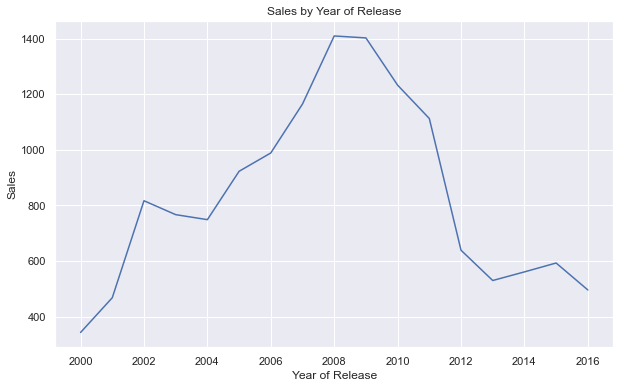

In [16]:
rcParams['figure.figsize'] = 10,6
plt.plot(df_yearsales)
plt.grid(True)
plt.title('Sales by Year of Release')
plt.xlabel('Year of Release')
plt.ylabel('Sales')
plt.show()

In [17]:
df_genre = vg_sales.groupby(['Genre'])[['Global_Sales']].sum()
df_genre = df_genre.sort_values('Global_Sales', ascending = False)
df_genre

,Global_Sales
Genre,
Action,1158.83
Sports,810.11
Shooter,547.13
Misc,507.84
Role-Playing,453.68
Racing,383.97
Platform,318.00
Fighting,267.52
Simulation,254.83


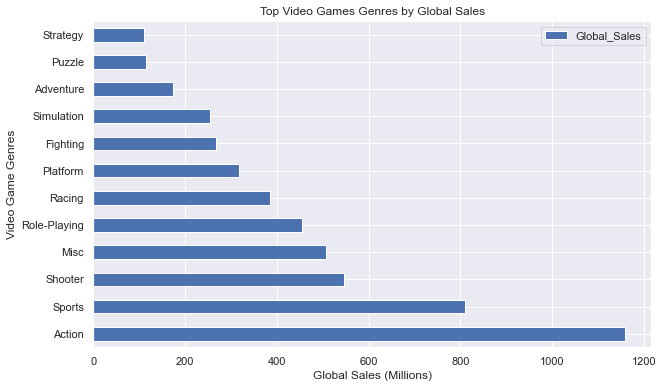

In [18]:
rcParams['figure.figsize'] = 10,6
df_genre.plot(kind='barh')
plt.grid(True)
plt.xlabel("Global Sales (Millions)");
plt.ylabel("Video Game Genres");
plt.title("Top Video Games Genres by Global Sales");
plt.savefig('Genre.png')
plt.show()

In [19]:
df_platform = vg_sales.groupby(['Platform'])[['Global_Sales']].sum()
df_platform = df_platform.sort_values('Global_Sales', ascending = False)
df_platform

,Global_Sales
Platform,
PS2,961.54
PS3,646.80
X360,642.04
DS,536.06
Wii,477.18
PSP,255.12
GBA,254.95
XB,237.17
PS4,177.22


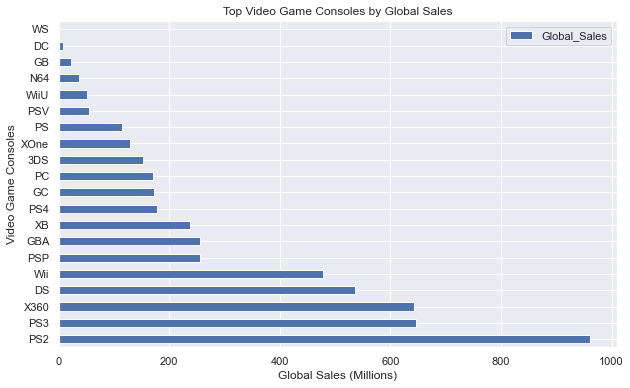

In [20]:
rcParams['figure.figsize'] = 10,6
df_platform.plot(kind='barh')
plt.grid(True)
plt.xlabel("Global Sales (Millions)");
plt.ylabel("Video Game Consoles");
plt.title("Top Video Game Consoles by Global Sales");
plt.savefig('Console.png')
plt.show()

From here I identified all null values and replaced with mean values where possible or simply removed if they offered to value.

In [21]:
vg_sales.isnull().sum()

Platform              0
Year_of_Release       0
Genre                 0
Publisher            32
Global_Sales          0
Critic_Score       6536
Critic_Count       6536
User_Score         7055
User_Count         7055
dtype: int64

In [22]:
vg_sales['Critic_Score'] = vg_sales['Critic_Score'].fillna(vg_sales['Critic_Score'].mean())
vg_sales['User_Score'] = vg_sales['User_Score'].fillna(vg_sales['User_Score'].mean())
vg_sales['Critic_Count'] = vg_sales['Critic_Count'].fillna(vg_sales['Critic_Score'].mean())
vg_sales['User_Count'] = vg_sales['User_Count'].fillna(vg_sales['User_Count'].mean())

In [23]:
vg_sales.isnull().sum()

Platform            0
Year_of_Release     0
Genre               0
Publisher          32
Global_Sales        0
Critic_Score        0
Critic_Count        0
User_Score          0
User_Count          0
dtype: int64

In [24]:
vg_sales = vg_sales.dropna()
vg_sales.isnull().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
dtype: int64

Next steps I undertook was getting an idea of unique values from games, platforms, genres and publishers.

As publishers had a high value, I determined it best to group between small, medium and large.

In [25]:
publishers = vg_sales['Publisher'].unique()
platforms = vg_sales['Platform'].unique()
genres = vg_sales['Genre'].unique()

print("Number of games: ", len(vg_sales))
print("Number of platforms: ", len(platforms))
print("Number of genres: ", len(genres))
print("Number of publishers: ", len(publishers))

Number of games:  14167
Number of platforms:  20
Number of genres:  12
Number of publishers:  461


In [26]:
vg_sales['Platform'].unique()

array(['PS2', 'Wii', 'PS3', 'GC', 'PS4', 'DS', 'PS', 'X360', 'XOne',
       '3DS', 'N64', 'PSP', 'WiiU', 'PC', 'XB', 'GBA', 'GB', 'PSV', 'DC',
       'WS'], dtype=object)

In [27]:
vg_sales['Genre'].unique()

array(['Action', 'Misc', 'Sports', 'Shooter', 'Racing', 'Simulation',
       'Fighting', 'Role-Playing', 'Platform', 'Puzzle', 'Adventure',
       'Strategy'], dtype=object)

In [28]:
vg_sales['Publisher'].unique()

array(['Capcom', 'Activision', 'Electronic Arts', 'LucasArts', 'Nintendo',
       'Ubisoft', '505 Games', 'THQ', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Eidos Interactive', 'Sega',
       'Namco Bandai Games', 'Konami Digital Entertainment',
       'Warner Bros. Interactive Entertainment', 'Microsoft Game Studios',
       'Atari', 'Square Enix', 'MTV Games',
       'Sony Computer Entertainment Europe', 'Disney Interactive Studios',
       'Bethesda Softworks', 'Majesco Entertainment',
       'Virgin Interactive', 'Level 5', 'Acclaim Entertainment',
       'Midway Games', 'RedOctane', 'Deep Silver', 'Vivendi Games',
       'NCSoft', 'SquareSoft', 'Tecmo Koei', 'Valve Software',
       'Mindscape', 'Infogrames', 'Universal Interactive', 'Unknown',
       'Valve', 'Hello Games', 'D3Publisher', 'Activision Value',
       'Oxygen Interactive', 'Enix Corporation', 'Global Star',
       'Gotham Games', 'GungHo', 'Crave Entertainment',
       'Rising Star Games', 'Codema

In [29]:
vg_sales['Publisher'].value_counts()

Electronic Arts                 1200
Ubisoft                          892
Activision                       884
Namco Bandai Games               842
Konami Digital Entertainment     693
                                ... 
Team17 Software                    1
Max Five                           1
Black Label Games                  1
Sony Oznline Entertainment         1
Red Flagship                       1
Name: Publisher, Length: 461, dtype: int64

In [30]:
counts = vg_sales['Publisher'].value_counts()
vg_sales['Publisher'] = vg_sales['Publisher'].apply(lambda x: ('Sml_Publisher' if counts[x] < 100 else ('Med_Publisher' if counts[x] < 500 else 'Lge_Publisher')))

In [31]:
vg_sales['Publisher'].value_counts()

Lge_Publisher    6213
Med_Publisher    4198
Sml_Publisher    3756
Name: Publisher, dtype: int64

In [32]:
vg_sales.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
350,PS2,2005.0,Action,Med_Publisher,3.62,96.0,38.0,8.9,1013.0
351,Wii,2008.0,Misc,Lge_Publisher,3.62,86.0,18.0,7.6,71.0
352,PS3,2009.0,Sports,Lge_Publisher,3.62,91.0,56.0,7.6,203.0
353,PS2,2004.0,Shooter,Sml_Publisher,3.61,82.0,36.0,8.7,142.0
355,PS2,2001.0,Racing,Lge_Publisher,3.61,64.0,23.0,7.7,32.0


To keep critic and user score consistent, I multiplied user by 10 to keep all values scored out of 100.

In [33]:
vg_sales['User_Score'] = vg_sales['User_Score'] * 10
vg_sales['User_Score'].head()

350    89.0
351    76.0
352    76.0
353    87.0
355    77.0
Name: User_Score, dtype: float64

In [34]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         14167 non-null  object 
 1   Year_of_Release  14167 non-null  float64
 2   Genre            14167 non-null  object 
 3   Publisher        14167 non-null  object 
 4   Global_Sales     14167 non-null  float64
 5   Critic_Score     14167 non-null  float64
 6   Critic_Count     14167 non-null  float64
 7   User_Score       14167 non-null  float64
 8   User_Count       14167 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.1+ MB


Next I split variables between continious and categorical values and assigned dummy data to cat variables.

In [35]:
df_cont = vg_sales[['Global_Sales', 'Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count']].copy()
df_cat = vg_sales[['Platform','Genre','Publisher']].copy()

In [36]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Platform   14167 non-null  object
 1   Genre      14167 non-null  object
 2   Publisher  14167 non-null  object
dtypes: object(3)
memory usage: 442.7+ KB


In [37]:
df_cat = pd.get_dummies(df_cat)
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Platform_3DS             14167 non-null  uint8
 1   Platform_DC              14167 non-null  uint8
 2   Platform_DS              14167 non-null  uint8
 3   Platform_GB              14167 non-null  uint8
 4   Platform_GBA             14167 non-null  uint8
 5   Platform_GC              14167 non-null  uint8
 6   Platform_N64             14167 non-null  uint8
 7   Platform_PC              14167 non-null  uint8
 8   Platform_PS              14167 non-null  uint8
 9   Platform_PS2             14167 non-null  uint8
 10  Platform_PS3             14167 non-null  uint8
 11  Platform_PS4             14167 non-null  uint8
 12  Platform_PSP             14167 non-null  uint8
 13  Platform_PSV             14167 non-null  uint8
 14  Platform_WS              14167 non-null  uint8
 15  

In [38]:
df_cont.describe()

,Global_Sales,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
count,14167.000000,14167.000000,14167.000000,14167.000000,14167.000000,14167.000000
mean,0.359418,2008.020964,68.387651,45.325182,70.952986,129.266277
std,0.540833,4.109083,10.073088,25.093801,10.651419,318.889129
min,0.010000,2000.000000,13.000000,3.000000,0.000000,4.000000
25%,0.050000,2005.000000,68.386141,20.000000,70.950028,23.000000
50%,0.150000,2008.000000,68.386141,56.000000,70.950028,129.274356
75%,0.410000,2011.000000,71.000000,68.386141,75.000000,129.274356
max,3.620000,2016.000000,97.000000,107.000000,97.000000,10665.000000


In order to normalize the data, I dropped all User Score with a value of 0.
Then I used mean normalization to transform the data and created some tables to assist with the assessment of the data and then merged cont and cat data.

In [39]:
df_cont = df_cont[df_cont['User_Score'] !=0]

In [40]:
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

df_log_norm.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log
350,2.310730,-0.734710,2.078818,0.100262,1.185452,2.197039
351,2.310730,-0.004079,1.429224,-0.793370,0.414350,0.102096
352,2.310730,0.239222,1.762949,0.564010,0.414350,0.930087
353,2.308723,-0.978497,1.147964,0.035600,1.074461,0.648412
355,2.308723,-1.710588,-0.315596,-0.500215,0.478187,-0.526030


In [41]:
df_log_norm.describe()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log
count,1.416600e+04,1.416600e+04,1.416600e+04,1.416600e+04,1.416600e+04,1.416600e+04
mean,-1.247160e-13,-3.352823e-11,5.201732e-12,8.856275e-13,-2.567935e-12,6.258092e-13
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.963718e+00,-1.954862e+00,-9.728333e+00,-2.936226e+00,-1.734940e+01,-2.164979e+00
25%,-7.960544e-01,-7.347105e-01,7.585299e-02,-6.673639e-01,7.858063e-02,-7.863156e-01
50%,9.999942e-04,-4.079098e-03,7.585299e-02,5.640105e-01,7.858063e-02,5.744111e-01
75%,7.305163e-01,7.254615e-01,2.973608e-01,8.029836e-01,3.496689e-01,5.744111e-01
max,2.310730e+00,1.938947e+00,2.140014e+00,1.338361e+00,1.605788e+00,4.052427e+00


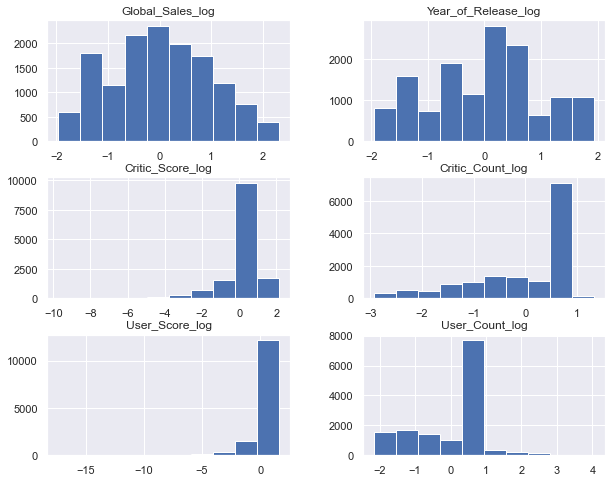

In [42]:
df_log_norm.hist(figsize=(10,8));

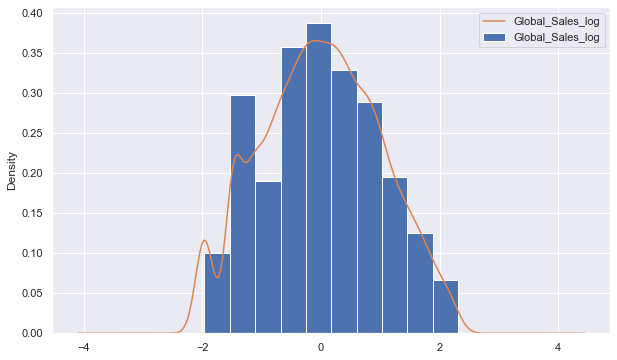

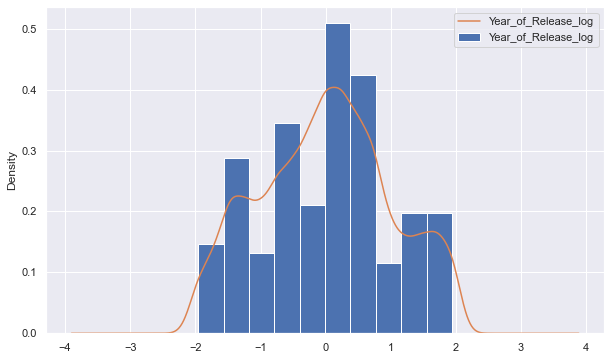

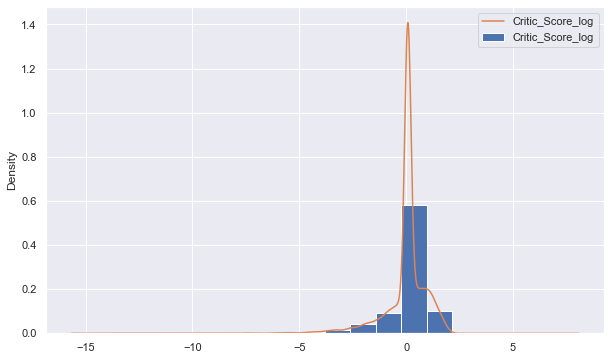

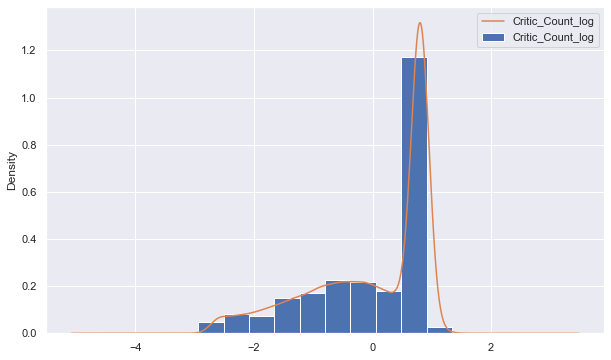

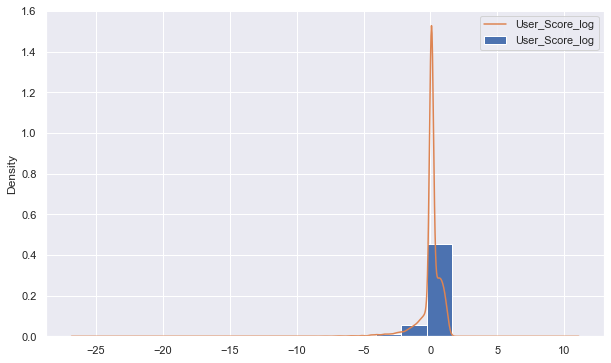

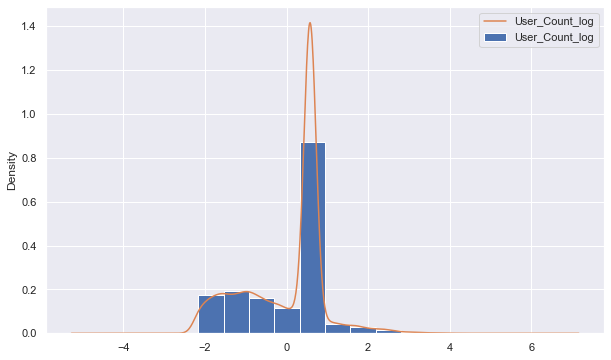

In [43]:
x = list(df_log_norm)
for column in x:
    df_log_norm[column].plot.hist(density=True)
    df_log_norm[column].plot.kde(label=column)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


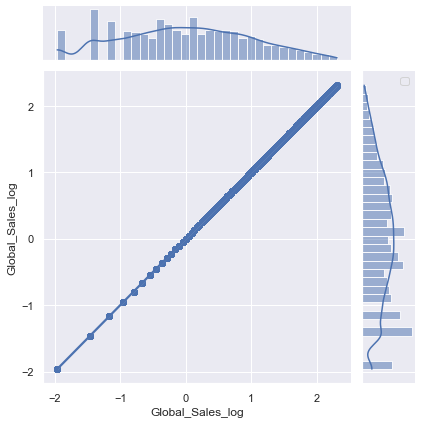

No handles with labels found to put in legend.


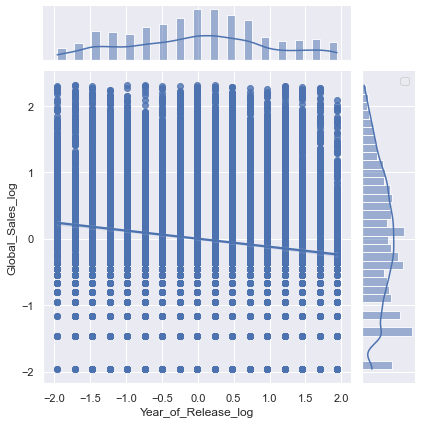

No handles with labels found to put in legend.


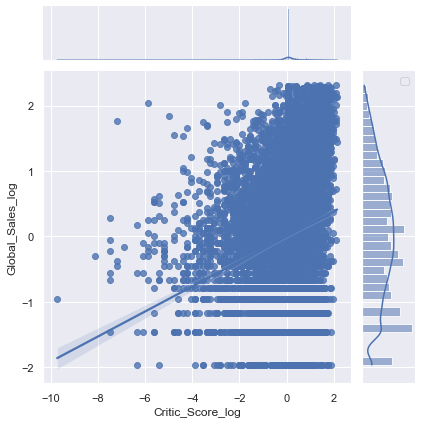

No handles with labels found to put in legend.


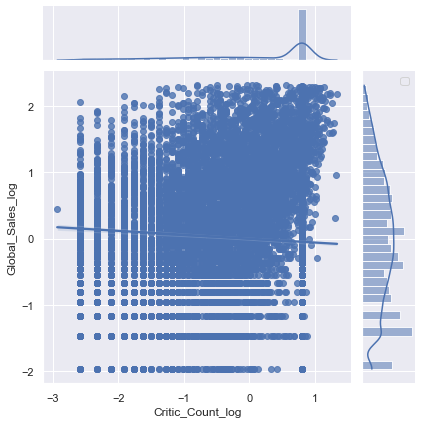

No handles with labels found to put in legend.


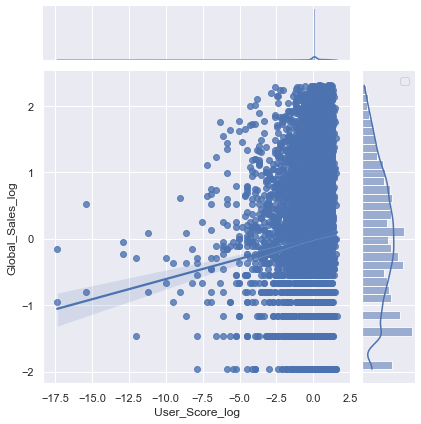

No handles with labels found to put in legend.


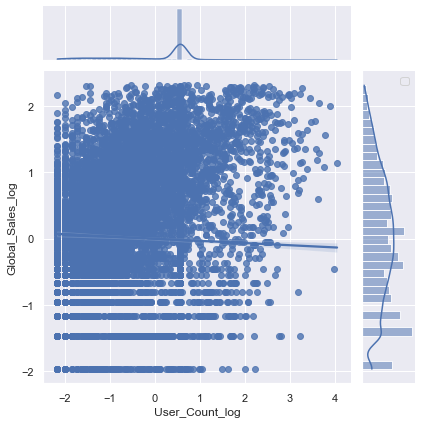

In [44]:
for column in x:
    sns.jointplot(x = column, y='Global_Sales_log', data=df_log_norm, kind = 'reg', label = column)
    plt.legend()
    plt.show()

In [45]:
df_merged = pd.concat([df_log_norm,df_cat], axis = 1)
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
350,2.310730,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,2.310730,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,2.310730,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
353,2.308723,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,2.308723,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


From the correlation matrix, no key features could be identified however I rand some OLS modelling from just cont data, then cat data then a merging of the data.

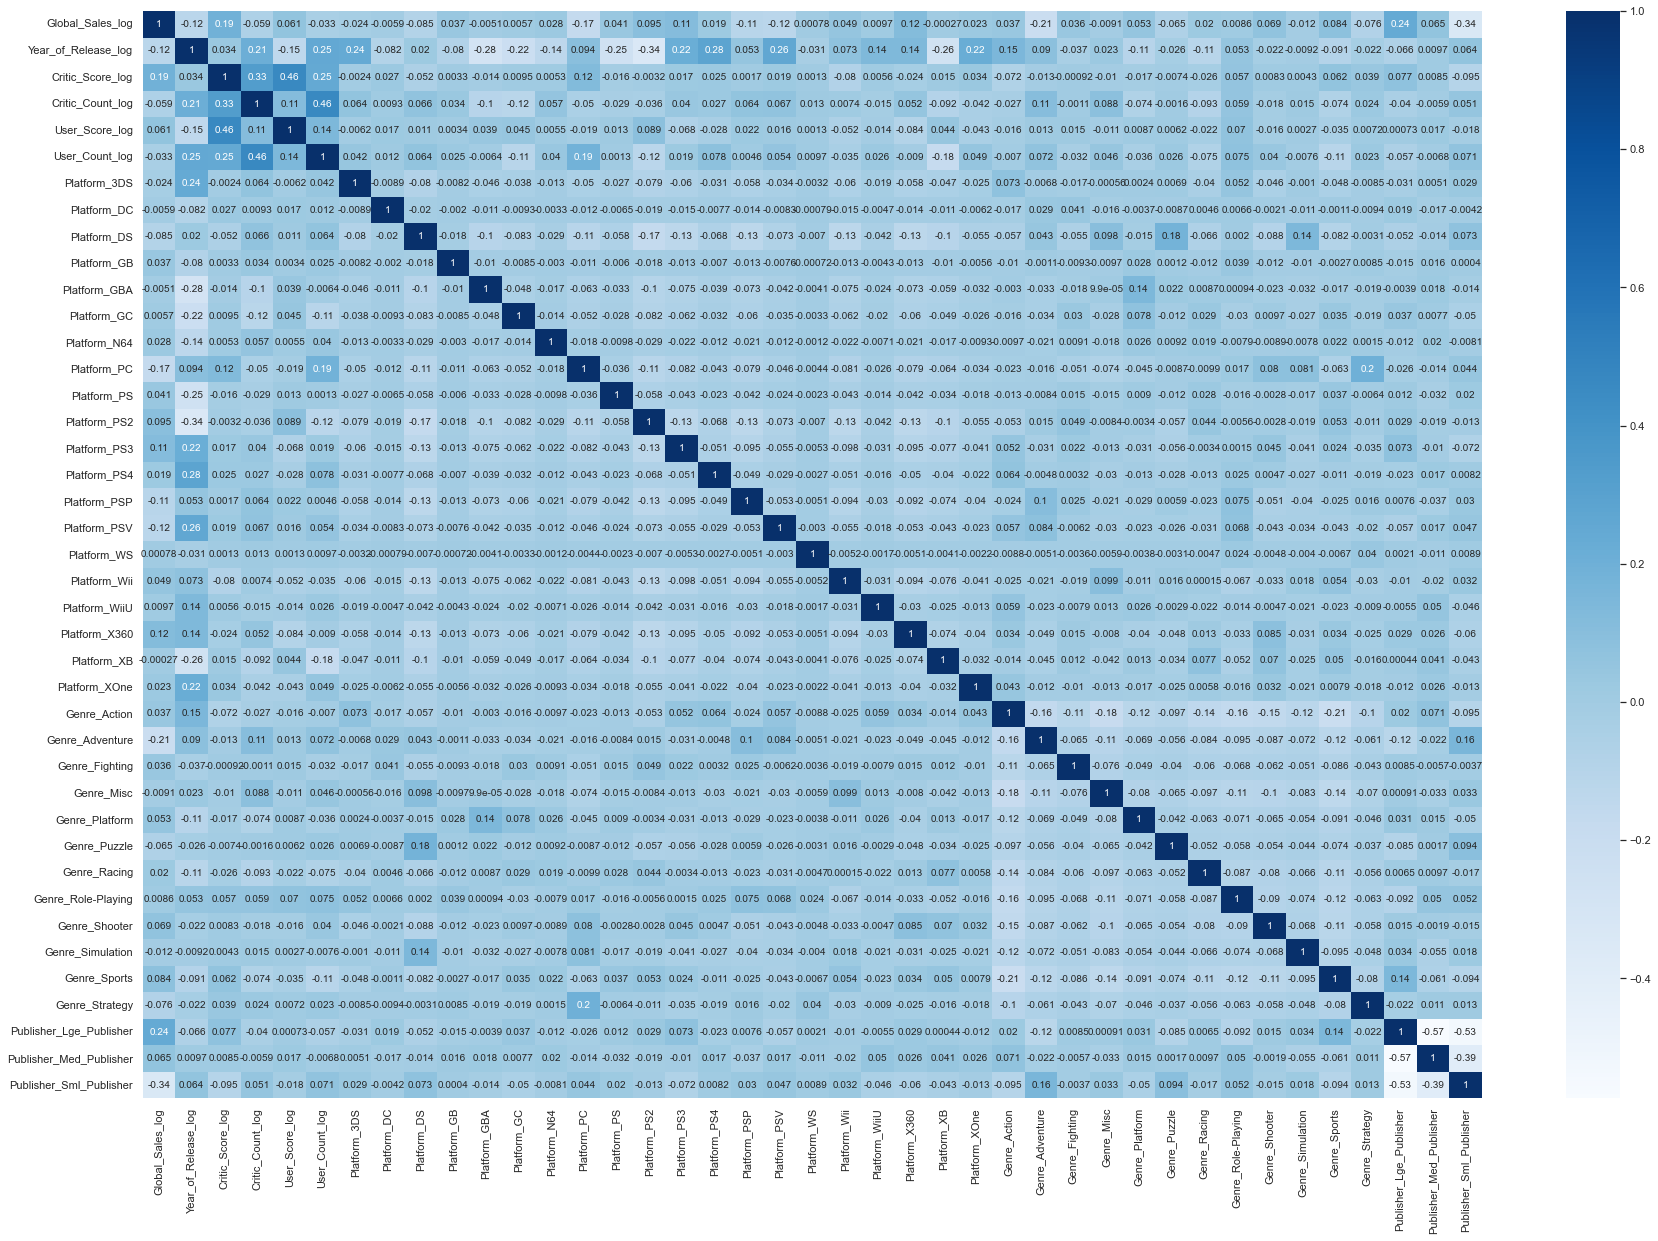

In [46]:
corr = df_merged.corr()
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, cmap="Blues", annot=True);

In [47]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Platform_3DS             14167 non-null  uint8  
 7   Platform_DC              14167 non-null  uint8  
 8   Platform_DS              14167 non-null  uint8  
 9   Platform_GB              14167 non-null  uint8  
 10  Platform_GBA             14167 non-null  uint8  
 11  Platform_GC              14167 non-null  uint8  
 12  Platform_N64             14167 non-null  uint8  
 13  Platform_PC              14167 non-null  uint8  
 14  Platform_PS         

In [48]:
df_merged.rename(columns = {'Genre_Role-Playing':'Genre_Role_Playing'}, inplace = True)

In [49]:
cols = df_merged.describe().columns[1:6]

results = [['ind var','r_squared','intercept','slope','p-value']]
for idx, val in enumerate(cols):
    print('Global_Sales_log~' + val)
    f = 'Global_Sales_log~' +val
    model = smf.ols(formula=f, data=df_merged).fit()
    X_new = pd.DataFrame({val: [df_merged[val].min(), df_merged[val].max()]});
    pred = model.predict(X_new)
    results.append([val,model.rsquared,model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])
    print(model.summary())

Global_Sales_log~Year_of_Release_log
['Year_of_Release_log', 0.01491706075750543, -4.183244191584973e-12, -0.12213541974998592, 3.249739325972984e-48]
                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     214.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           3.25e-48
Time:                        10:06:55   Log-Likelihood:                -19994.
No. Observations:               14166   AIC:                         3.999e+04
Df Residuals:                   14164   BIC:                         4.001e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


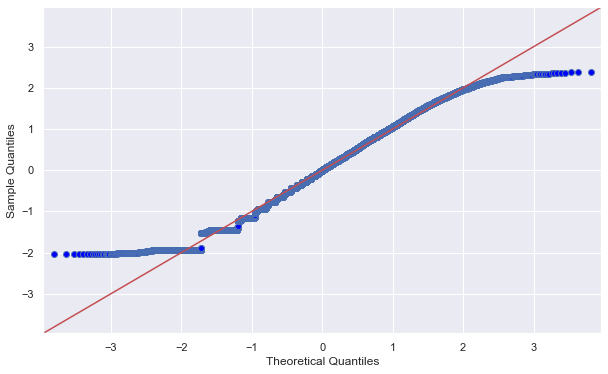

In [50]:
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [51]:
f = 'Global_Sales_log ~ ' + ' + '.join(cols)
model_2 = ols(formula=f, data=df_merged).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     204.2
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          6.38e-211
Time:                        10:06:55   Log-Likelihood:                -19607.
No. Observations:               14166   AIC:                         3.923e+04
Df Residuals:                   14160   BIC:                         3.927e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -5.359e-12      0.008   -6.6e-10      1.000      -0.016       0.016
Year_of_Release_log    -0.1147      0.009    -13.329      0.000      -0.132      -0.098
Critic_Score_log        0.2631      0.010     27.203      0.000       0.244       0.282
Critic_Count_log       -0.1102      0.010    -11.563      0.000      -0.129      -0.091
User_Score_log         -0.0633      0.009     -6.777      0.000      -0.082      -0.045
User_Count_log         -0.0097      0.009     -1.027      0.304      -0.028       0.009
==============================================================================
Omnibus:                      472.157   Durbin-Watson:                   0.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.758
Skew:                          -0.023   Prob(JB):                     5.18e-48
Kurtosis:                       2.394   Cond. No.                         2.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


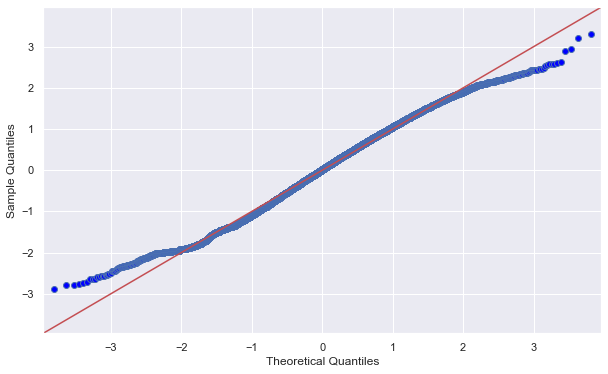

In [52]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [53]:
c_platform = df_merged.columns[6:26]
c_genre = df_merged.columns[26:38]
c_publisher = df_merged.columns[38:41]

In [54]:
cols = [c_platform, c_genre, c_publisher]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_3 = smf.ols(formula=f, data=df_merged).fit()
    print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     79.77
Date:                Tue, 21 Jun 2022   Prob (F-statistic):          2.33e-294
Time:                        10:06:56   Log-Likelihood:                -19379.
No. Observations:               14166   AIC:                         3.880e+04
Df Residuals:                   14146   BIC:                         3.895e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.01e+12   6.64e+11      1.520

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


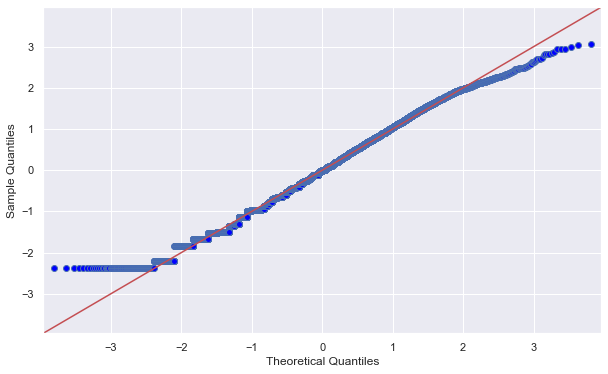

In [55]:
residuals = model_3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [56]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Platform_3DS             14167 non-null  uint8  
 7   Platform_DC              14167 non-null  uint8  
 8   Platform_DS              14167 non-null  uint8  
 9   Platform_GB              14167 non-null  uint8  
 10  Platform_GBA             14167 non-null  uint8  
 11  Platform_GC              14167 non-null  uint8  
 12  Platform_N64             14167 non-null  uint8  
 13  Platform_PC              14167 non-null  uint8  
 14  Platform_PS         

In [57]:
df_merged1 = df_merged
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Platform_3DS             14167 non-null  uint8  
 7   Platform_DC              14167 non-null  uint8  
 8   Platform_DS              14167 non-null  uint8  
 9   Platform_GB              14167 non-null  uint8  
 10  Platform_GBA             14167 non-null  uint8  
 11  Platform_GC              14167 non-null  uint8  
 12  Platform_N64             14167 non-null  uint8  
 13  Platform_PC              14167 non-null  uint8  
 14  Platform_PS         

In [58]:
all_cols = df_merged1.columns[1:41]

In [59]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_4 = smf.ols(formula=f, data=df_merged1).fit()
    print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     145.7
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:06:56   Log-Likelihood:                -17811.
No. Observations:               14166   AIC:                         3.570e+04
Df Residuals:                   14128   BIC:                         3.598e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -9

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


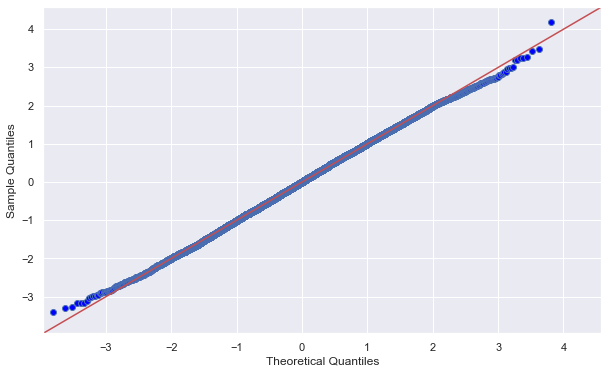

In [60]:
residuals = model_4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [61]:
df_merged1.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
350,2.310730,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,2.310730,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,2.310730,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
353,2.308723,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,2.308723,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [62]:
y = df_merged1[['Global_Sales_log']]
X = df_merged1.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
350,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
353,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [63]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [64]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Platform_3DS               0
Platform_DC                0
Platform_DS                0
Platform_GB                0
Platform_GBA               0
Platform_GC                0
Platform_N64               0
Platform_PC                0
Platform_PS                0
Platform_PS2               0
Platform_PS3               0
Platform_PS4               0
Platform_PSP               0
Platform_PSV               0
Platform_WS                0
Platform_Wii               0
Platform_WiiU              0
Platform_X360              0
Platform_XB                0
Platform_XOne              0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulati

In [65]:
np.any(np.isnan(y))

True

In [66]:
np.any(np.isnan(y))

True

In [67]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [68]:
np.any(np.isnan(y))

False

In [69]:
np.all(np.isfinite(y))

True

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [71]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [72]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [73]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.03417969]
 [ 0.01318359]
 [-1.41259766]
 ...
 [ 0.38330078]
 [ 1.16308594]
 [ 0.58544922]]


In [74]:
r2_score(y_test,y_pred)

0.25245393367439384

C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


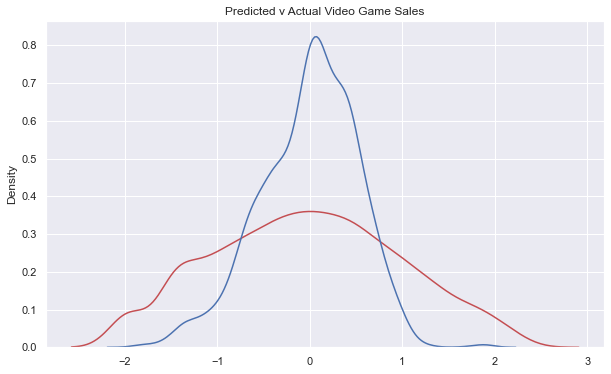

In [75]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

Most of the R^2 values where not great so I completed the stepwise selection function to see if there was any improvement, however there was not much improvement at all.

In [76]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [77]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Publisher_Sml_Publisher        with p-value 0.0
Add  Critic_Score_log               with p-value 4.45593e-92
Add  Platform_PC                    with p-value 9.29409e-114
Add  Genre_Adventure                with p-value 1.56344e-97
Add  Platform_PSV                   with p-value 3.45575e-44
Add  Platform_PSP                   with p-value 5.63048e-49
Add  Platform_DS                    with p-value 1.67756e-37
Add  Critic_Count_log               with p-value 1.09406e-31
Add  Platform_XB                    with p-value 3.45265e-20
Add  Platform_GBA                   with p-value 2.40304e-18
Add  Platform_GC                    with p-value 1.54282e-20
Add  Year_of_Release_log            with p-value 2.76069e-29
Add  Platform_PS2                   with p-value 5.19409e-14
Add  Genre_Shooter                  with p-value 3.81829e-12
Add  Publisher_Lge_Publisher        with p-value 3.72701e-11
Add  Genre_Strategy                 with p-value 4.95715e-10
Add  User_Count_log            

In [78]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_5 = sm.OLS(y,X_with_intercept).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     192.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:09   Log-Likelihood:                -17816.
No. Observations:               14166   AIC:                         3.569e+04
Df Residuals:                   14137   BIC:                         3.591e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.4074      0.023     18.083      0.000       0.363       0.452
Publisher_Sml_Publisher    -0.5106      0.020    -26.099      0.000      -0.549      -0.472
Critic_Score_log            0.2509      0.009     28.404      0.000       0.234       0.268
Platform_PC                -1.0399      0.034    -30.446      0.000      -1.107      -0.973
Genre_Adventure            -0.3732      0.029    -13.094      0.000      -0.429      -0.317
Platform_PSV               -0.6041      0.045    -13.365      0.000      -0.693      -0.516
Platform_PSP               -0.5866      0.030    -19.479      0.000      -0.646      -0.528
Platform_DS                -0.4024      0.026    -15.646      0.000      -0.453      -0.352
Critic_Count_log           -0.1271      0.009    -14.547      0.000      -0.144      -0.110
Platform_XB                -0.6356      0.040    -15.838      0.000      -0.714      -0.557
Platform_GBA               -0.6629      0.041    -15.982      0.000      -0.744      -0.582
Platform_GC                -0.6743      0.046    -14.772      0.000      -0.764      -0.585
Year_of_Release_log        -0.1984      0.013    -15.788      0.000      -0.223      -0.174
Platform_PS2               -0.2665      0.031     -8.734      0.000      -0.326      -0.207
Genre_Shooter               0.1964      0.029      6.798      0.000       0.140       0.253
Publisher_Lge_Publisher     0.1190      0.017      6.897      0.000       0.085       0.153
Genre_Strategy             -0.1933      0.039     -4.927      0.000      -0.270      -0.116
User_Count_log              0.0595      0.009      6.833      0.000       0.042       0.077
User_Score_log             -0.0506      0.008     -6.039      0.000      -0.067      -0.034
Platform_PS                -0.3795      0.063     -6.060      0.000      -0.502      -0.257
Platform_DC                -0.9310      0.157     -5.920      0.000      -1.239      -0.623
Genre_Puzzle               -0.1483      0.042     -3.551      0.000      -0.230      -0.066
Platform_X360               0.0881      0.029      3.025      0.002       0.031       0.145
Genre_Role_Playing          0.1504      0.027      5.479      0.000       0.097       0.204
Platform_3DS               -0.1560      0.042     -3.744      0.000      -0.238      -0.074
Genre_Platform              0.1490      0.035      4.279      0.000       0.081       0.217
Genre_Action                0.0838      0.020      4.186      0.000       0.045       0.123
Genre_Fighting              0.1173      0.036      3.252      0.001       0.047       0.188
Platform_N64               -0.3177      0.108     -2.930      0.003      -0.530      -0.105
==============================================================================
Omnibus:                       22.836   Durbin-Watson:      

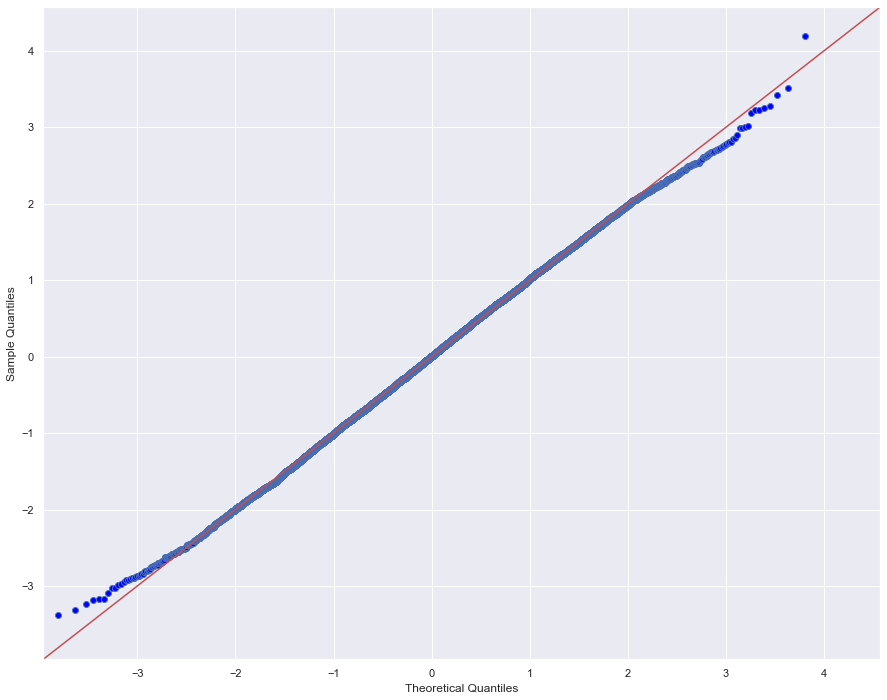

In [79]:
residuals = model_5.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [80]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
350,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
353,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [81]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Platform_3DS               0
Platform_DC                0
Platform_DS                0
Platform_GB                0
Platform_GBA               0
Platform_GC                0
Platform_N64               0
Platform_PC                0
Platform_PS                0
Platform_PS2               0
Platform_PS3               0
Platform_PS4               0
Platform_PSP               0
Platform_PSV               0
Platform_WS                0
Platform_Wii               0
Platform_WiiU              0
Platform_X360              0
Platform_XB                0
Platform_XOne              0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulati

In [82]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [83]:
np.any(np.isnan(y))

False

In [84]:
np.all(np.isfinite(y))

True

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [86]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [87]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [88]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.03417969]
 [ 0.01318359]
 [-1.41259766]
 ...
 [ 0.38330078]
 [ 1.16308594]
 [ 0.58544922]]


In [89]:
r2_score(y_test,y_pred)

0.25245393367439384

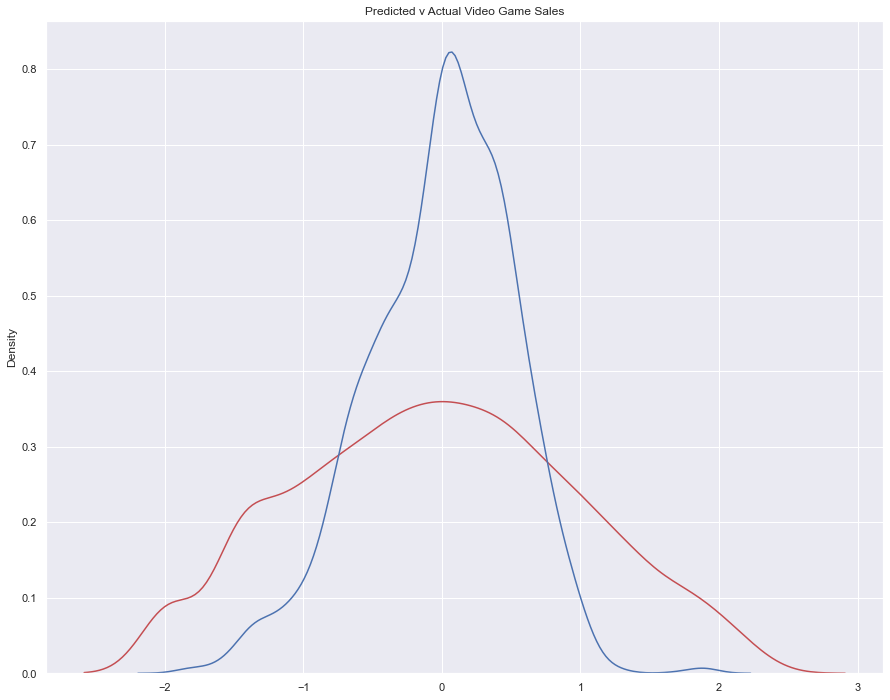

In [90]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [91]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Platform_3DS             14167 non-null  uint8  
 7   Platform_DC              14167 non-null  uint8  
 8   Platform_DS              14167 non-null  uint8  
 9   Platform_GB              14167 non-null  uint8  
 10  Platform_GBA             14167 non-null  uint8  
 11  Platform_GC              14167 non-null  uint8  
 12  Platform_N64             14167 non-null  uint8  
 13  Platform_PC              14167 non-null  uint8  
 14  Platform_PS         

Next I attempted to merge the platforms of the same publisher e.g. PS, PS2, PS3 under Sony etc. From here I ran the OLS models again however still saw no improvement.

In [92]:
sum_col = df_merged['Platform_3DS']+df_merged['Platform_DS'] + df_merged['Platform_GB']+ df_merged['Platform_GBA'] + df_merged['Platform_GC']+df_merged['Platform_N64']+df_merged['Platform_WiiU']+df_merged['Platform_Wii']
df_merged['Nintendo'] = sum_col

In [93]:
sum_col = df_merged['Platform_PS'] + df_merged['Platform_PS3']+df_merged['Platform_PS2']+ df_merged['Platform_PS4']+df_merged['Platform_PSP']+df_merged['Platform_PSV']
df_merged['Sony'] = sum_col

In [94]:
sum_col = df_merged['Platform_X360']+df_merged['Platform_XOne']+df_merged['Platform_XB']
df_merged['Microsoft'] = sum_col

In [95]:
sum_col = df_merged['Platform_DC']
df_merged['Sega'] = sum_col

In [96]:
sum_col = df_merged['Platform_PC'] + df_merged['Platform_WS']
df_merged['PC'] = sum_col

In [97]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Platform_3DS             14167 non-null  uint8  
 7   Platform_DC              14167 non-null  uint8  
 8   Platform_DS              14167 non-null  uint8  
 9   Platform_GB              14167 non-null  uint8  
 10  Platform_GBA             14167 non-null  uint8  
 11  Platform_GC              14167 non-null  uint8  
 12  Platform_N64             14167 non-null  uint8  
 13  Platform_PC              14167 non-null  uint8  
 14  Platform_PS         

In [98]:
df_merged = df_merged.drop(df_merged.columns[6:27], axis=1)

In [99]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Global_Sales_log         14166 non-null  float64
 1   Year_of_Release_log      14166 non-null  float64
 2   Critic_Score_log         14166 non-null  float64
 3   Critic_Count_log         14166 non-null  float64
 4   User_Score_log           14166 non-null  float64
 5   User_Count_log           14166 non-null  float64
 6   Genre_Adventure          14167 non-null  uint8  
 7   Genre_Fighting           14167 non-null  uint8  
 8   Genre_Misc               14167 non-null  uint8  
 9   Genre_Platform           14167 non-null  uint8  
 10  Genre_Puzzle             14167 non-null  uint8  
 11  Genre_Racing             14167 non-null  uint8  
 12  Genre_Role_Playing       14167 non-null  uint8  
 13  Genre_Shooter            14167 non-null  uint8  
 14  Genre_Simulation    

In [100]:
all_cols = df_merged.columns[1:25]

In [101]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_6 = smf.ols(formula=f, data=df_merged).fit()
    print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     189.5
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:10   Log-Likelihood:                -18270.
No. Observations:               14166   AIC:                         3.659e+04
Df Residuals:                   14143   BIC:                         3.676e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -1

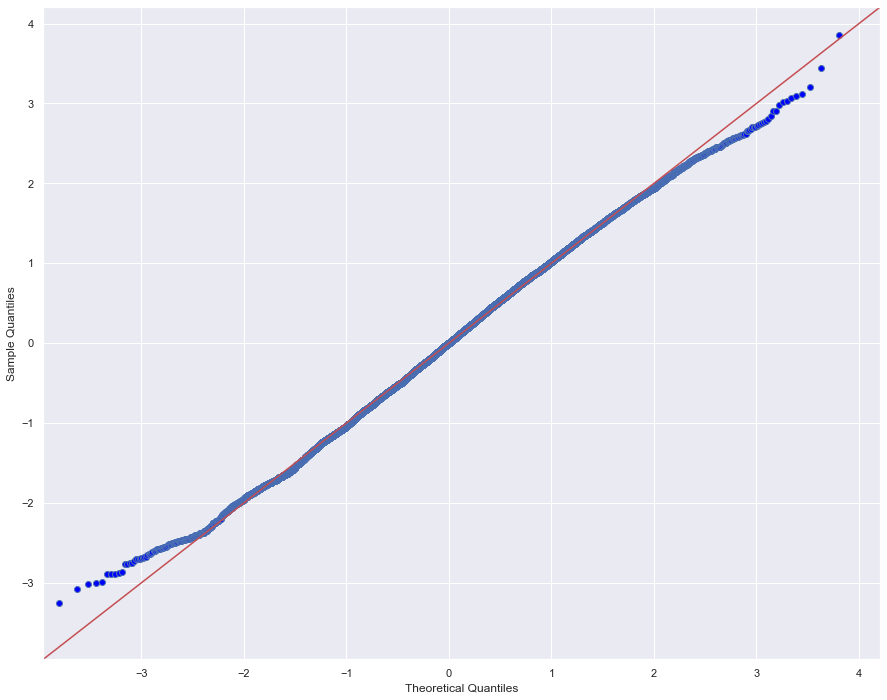

In [102]:
residuals = model_6.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [103]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC
350,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
351,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
352,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
353,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
355,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [104]:
y.reindex(X.index)

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723
...,...
16714,-1.963718
16715,-1.963718
16716,-1.963718
16717,-1.963718


In [105]:
X.reindex(y.index)

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,...,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC
350,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
351,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
352,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
353,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
355,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,1.938947,0.075853,0.802984,0.078581,0.574411,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16715,-0.491045,0.075853,0.802984,0.078581,0.574411,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
16716,1.938947,0.075853,0.802984,0.078581,0.574411,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
16717,-1.222406,0.075853,0.802984,0.078581,0.574411,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0


In [106]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulation           0
Genre_Sports               0
Genre_Strategy             0
Publisher_Lge_Publisher    0
Publisher_Med_Publisher    0
Publisher_Sml_Publisher    0
Nintendo                   0
Sony                       0
Microsoft                  0
Sega                       0
PC                         0
dtype: int64

In [107]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [108]:
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [109]:
list(X.columns)

['Year_of_Release_log',
 'Critic_Score_log',
 'Critic_Count_log',
 'User_Score_log',
 'User_Count_log',
 'Genre_Adventure',
 'Genre_Fighting',
 'Genre_Misc',
 'Genre_Platform',
 'Genre_Puzzle',
 'Genre_Racing',
 'Genre_Role_Playing',
 'Genre_Shooter',
 'Genre_Simulation',
 'Genre_Sports',
 'Genre_Strategy',
 'Publisher_Lge_Publisher',
 'Publisher_Med_Publisher',
 'Publisher_Sml_Publisher',
 'Nintendo',
 'Sony',
 'Microsoft',
 'Sega',
 'PC']

In [110]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulation           0
Genre_Sports               0
Genre_Strategy             0
Publisher_Lge_Publisher    0
Publisher_Med_Publisher    0
Publisher_Sml_Publisher    0
Nintendo                   0
Sony                       0
Microsoft                  0
Sega                       0
PC                         0
dtype: int64

In [111]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [112]:
np.any(np.isnan(y))

False

In [113]:
np.all(np.isfinite(y))

True

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [115]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [116]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [117]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.04150755]
 [ 0.3039703 ]
 [-1.32644752]
 ...
 [ 0.17582273]
 [ 0.98324665]
 [ 0.53443905]]


In [118]:
r2_score(y_test,y_pred)

0.2181190348013059

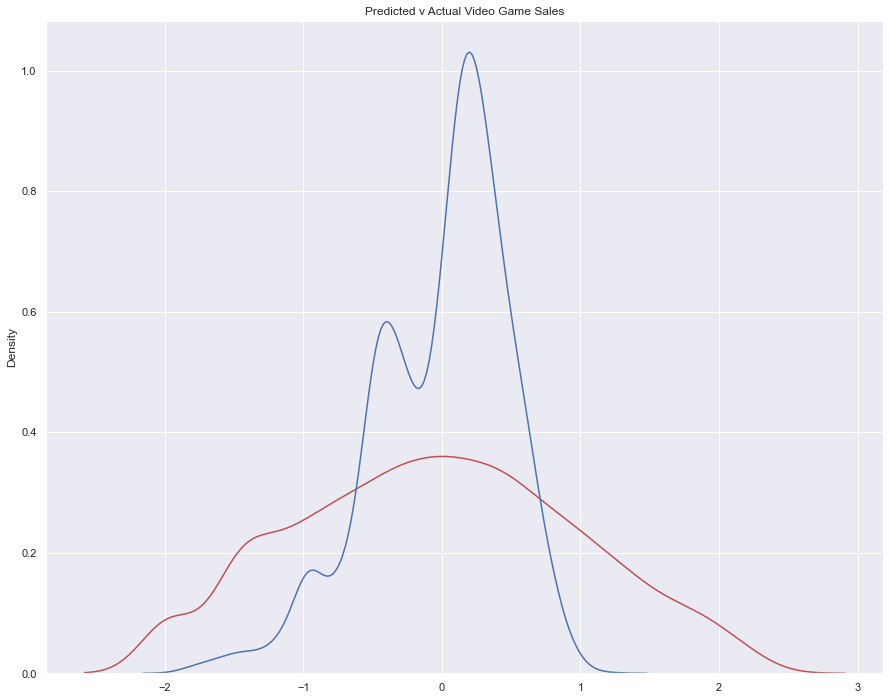

In [119]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

Next step was to run the stepswise selection on the new features, but once again saw no improvement.

In [120]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [121]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Publisher_Sml_Publisher        with p-value 0.0
Add  Critic_Score_log               with p-value 4.45593e-92
Add  PC                             with p-value 5.51014e-113
Add  Genre_Adventure                with p-value 1.40226e-97
Add  Critic_Count_log               with p-value 1.75653e-43
Add  Genre_Shooter                  with p-value 1.39933e-17
Add  Year_of_Release_log            with p-value 7.33485e-15
Add  Publisher_Lge_Publisher        with p-value 3.45869e-13
Add  User_Score_log                 with p-value 4.87417e-11
Add  User_Count_log                 with p-value 9.03854e-11
Add  Genre_Puzzle                   with p-value 7.5635e-10
Add  Genre_Strategy                 with p-value 1.07335e-10
Add  Nintendo                       with p-value 1.77657e-07
Add  Microsoft                      with p-value 0.00148453
Add  Sony                           with p-value 0.00811843
Add  Publisher_Med_Publisher        with p-value 0.00640632
resulting features:
['Publisher_Sml

In [122]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_7 = sm.OLS(y,X_with_intercept).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     258.1
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:15   Log-Likelihood:                -18287.
No. Observations:               14166   AIC:                         3.661e+04
Df Residuals:                   14149   BIC:                         3.674e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    -1.45e+12   5.32e+11     -2.727      0.006   -2.49e+12   -4.08e+11
Publisher_Sml_Publisher   1.45e+12   5.32e+11      2.727      0.006    4.08e+11    2.49e+12
Critic_Score_log            0.2406      0.009     26.567      0.000       0.223       0.258
PC                         -0.3798      0.162     -2.343      0.019      -0.697      -0.062
Genre_Adventure            -0.5207      0.028    -18.876      0.000      -0.575      -0.467
Critic_Count_log           -0.1193      0.009    -13.383      0.000      -0.137      -0.102
Genre_Shooter               0.1781      0.029      6.241      0.000       0.122       0.234
Year_of_Release_log        -0.0857      0.008    -10.774      0.000      -0.101      -0.070
Publisher_Lge_Publisher   1.45e+12   5.32e+11      2.727      0.006    4.08e+11    2.49e+12
User_Score_log             -0.0607      0.009     -7.073      0.000      -0.078      -0.044
User_Count_log              0.0634      0.009      7.159      0.000       0.046       0.081
Genre_Puzzle               -0.2374      0.042     -5.663      0.000      -0.320      -0.155
Genre_Strategy             -0.2559      0.040     -6.475      0.000      -0.333      -0.178
Nintendo                    0.3554      0.159      2.230      0.026       0.043       0.668
Microsoft                   0.4911      0.160      3.066      0.002       0.177       0.805
Sony                        0.4220      0.159      2.648      0.008       0.110       0.734
Publisher_Med_Publisher   1.45e+12   5.32e+11      2.727      0.006    4.08e+11    2.49e+12
==============================================================================
Omnibus:                       88.057   Durbin-Watson:                   0.433
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.743
Skew:                          -0.014   Prob(JB):                     3.91e-14
Kurtosis:                       2.678   Cond. No.                     2.00e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.85e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

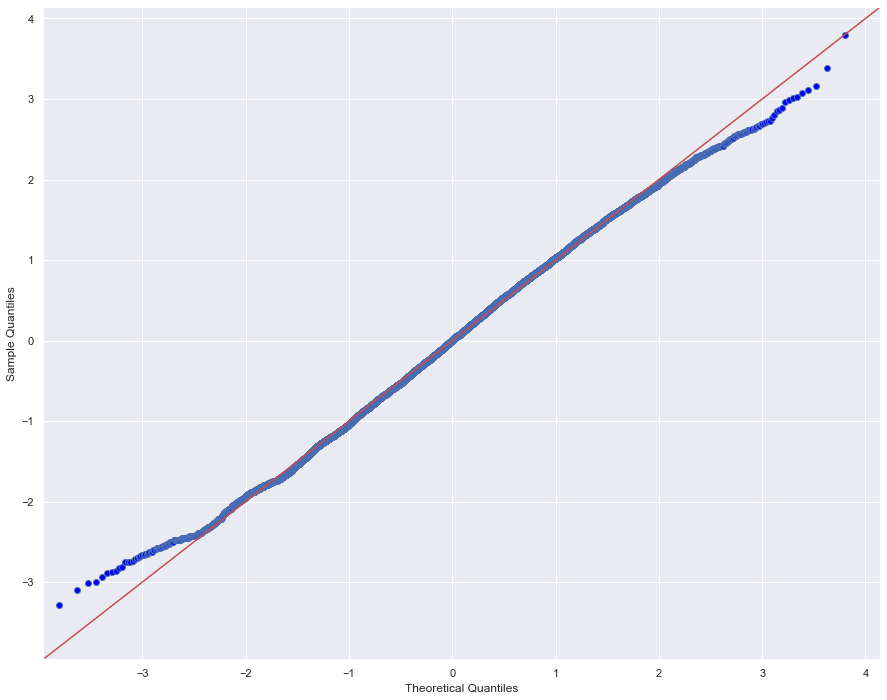

In [123]:
residuals = model_7.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [124]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True])

In [125]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [126]:
yhat = linreg.predict(X[selected_columns])

In [127]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [128]:
r_squared

Global_Sales_log    0.035659
dtype: float64

In [129]:
adjusted_r_squared

Global_Sales_log    0.035319
dtype: float64

In [130]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC
350,2.310730,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
351,2.310730,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
352,2.310730,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,...,1,0,1,0,0,0,1,0,0,0
353,2.308723,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
355,2.308723,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


To keep trying to find improvements, I created a total engagement variable by adding critic and user counts and a total score which was an average across critic and user score.

I ran the correlation matrix and however saw no key features, and after running the OLS model again so no improvement at all.
Even running the model again using stepwise selection saw no improvement.

In [131]:
df_merged['Total_Engagement'] = df_merged['Critic_Count_log'] + df_merged['User_Count_log']
df_merged['Total_Score'] = (df_merged['Critic_Score_log'] + df_merged['User_Score_log']) / 2
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,...,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
350,2.310730,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,...,0,1,0,0,1,0,0,0,2.297301,1.632135
351,2.310730,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,1,0,...,1,0,0,1,0,0,0,0,-0.691274,0.921787
352,2.310730,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,...,1,0,0,0,1,0,0,0,1.494097,1.088650
353,2.308723,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,...,0,0,1,0,1,0,0,0,0.684012,1.111213
355,2.308723,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,...,1,0,0,0,1,0,0,0,-1.026245,0.081295


In [132]:
drop_cols = ['Year_of_Release_log','Critic_Score_log', 'Critic_Count_log', 'User_Score_log', 'User_Count_log', 'Publisher_Lge_Publisher', 'Publisher_Med_Publisher', 'Publisher_Sml_Publisher']

df_merged.drop(drop_cols, axis=1, inplace=True)

In [133]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Global_Sales_log    14166 non-null  float64
 1   Genre_Adventure     14167 non-null  uint8  
 2   Genre_Fighting      14167 non-null  uint8  
 3   Genre_Misc          14167 non-null  uint8  
 4   Genre_Platform      14167 non-null  uint8  
 5   Genre_Puzzle        14167 non-null  uint8  
 6   Genre_Racing        14167 non-null  uint8  
 7   Genre_Role_Playing  14167 non-null  uint8  
 8   Genre_Shooter       14167 non-null  uint8  
 9   Genre_Simulation    14167 non-null  uint8  
 10  Genre_Sports        14167 non-null  uint8  
 11  Genre_Strategy      14167 non-null  uint8  
 12  Nintendo            14167 non-null  uint8  
 13  Sony                14167 non-null  uint8  
 14  Microsoft           14167 non-null  uint8  
 15  Sega                14167 non-null  uint8  
 16  PC

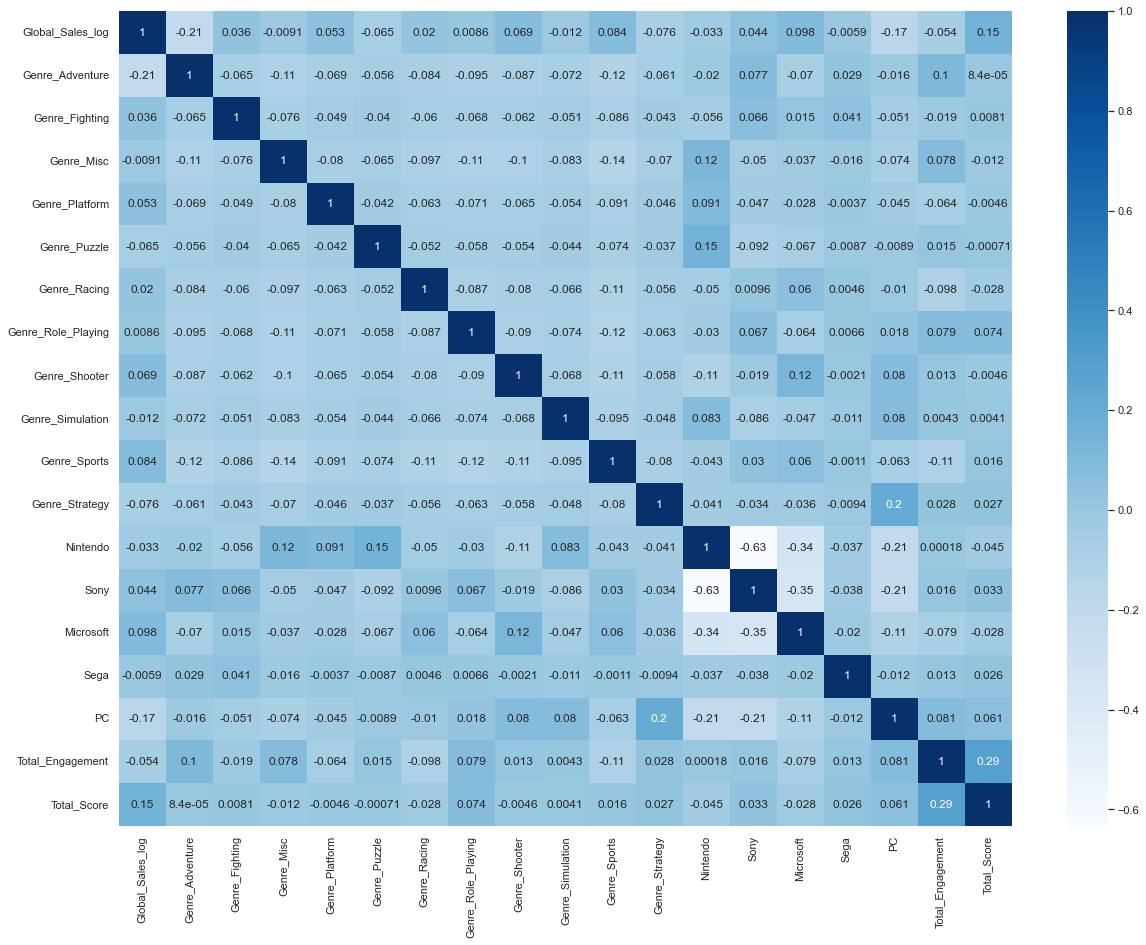

In [134]:
corr = df_merged.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap="Blues", annot=True);

In [135]:
all_cols = df_merged.columns[1:19]

In [136]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_8 = smf.ols(formula=f, data=df_merged).fit()
    print(model_8.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     113.0
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:18   Log-Likelihood:                -19198.
No. Observations:               14166   AIC:                         3.843e+04
Df Residuals:                   14148   BIC:                         3.857e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.545e+12   8.14

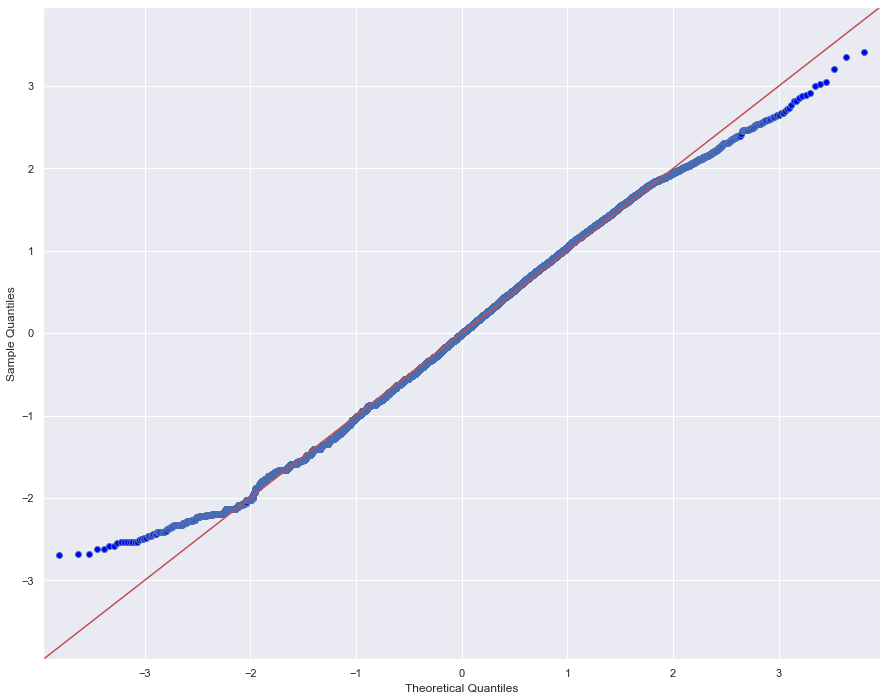

In [137]:
residuals = model_8.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [138]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
350,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.297301,1.632135
351,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.691274,0.921787
352,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1.494097,1.088650
353,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.684012,1.111213
355,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.026245,0.081295


In [139]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [140]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role_Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
Nintendo              0
Sony                  0
Microsoft             0
Sega                  0
PC                    0
Total_Engagement      0
Total_Score           0
dtype: int64

In [141]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [143]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [144]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [145]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.0435791 ]
 [ 0.0435791 ]
 [-0.62194824]
 ...
 [ 0.20239258]
 [ 0.56970215]
 [ 0.52941895]]


In [146]:
r2_score(y_test,y_pred)

0.11578427947455527

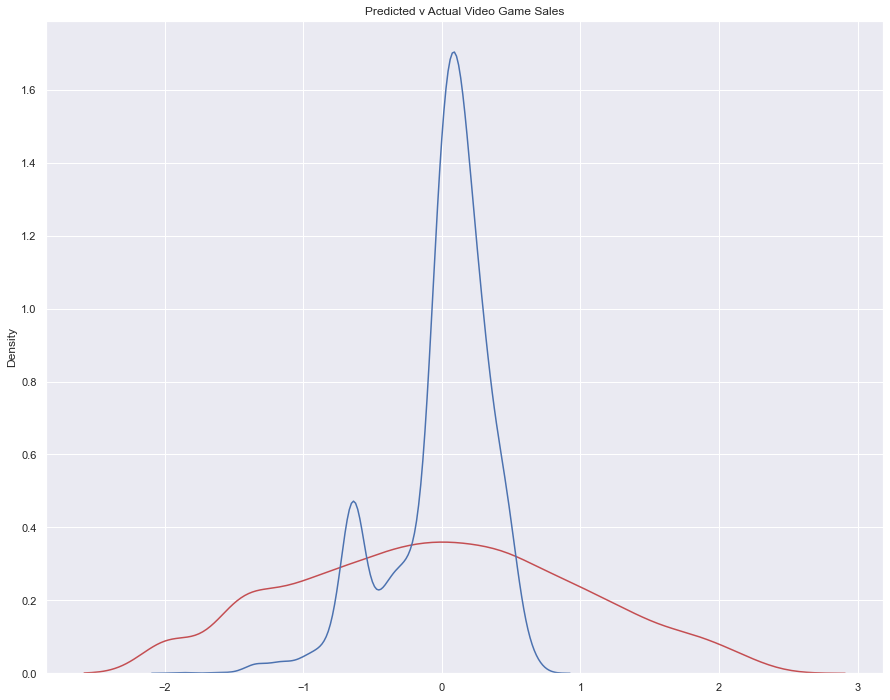

In [147]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [148]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [149]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Genre_Adventure                with p-value 1.83553e-134
Add  PC                             with p-value 2.86374e-97
Add  Total_Score                    with p-value 4.29626e-86
Add  Genre_Puzzle                   with p-value 6.42213e-23
Add  Total_Engagement               with p-value 9.55654e-16
Add  Genre_Shooter                  with p-value 9.40779e-16
Add  Genre_Strategy                 with p-value 5.89085e-12
Add  Microsoft                      with p-value 8.43111e-11
Add  Genre_Misc                     with p-value 1.97825e-06
Add  Sony                           with p-value 6.51333e-05
Add  Genre_Platform                 with p-value 0.00053333
Add  Genre_Sports                   with p-value 0.000100626
resulting features:
['Genre_Adventure', 'PC', 'Total_Score', 'Genre_Puzzle', 'Total_Engagement', 'Genre_Shooter', 'Genre_Strategy', 'Microsoft', 'Genre_Misc', 'Sony', 'Genre_Platform', 'Genre_Sports']


In [150]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_9 = sm.OLS(y,X_with_intercept).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.120
Method:                 Least Squares   F-statistic:                     161.3
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:20   Log-Likelihood:                -19192.
No. Observations:               14166   AIC:                         3.841e+04
Df Residuals:                   14153   BIC:                         3.851e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0374      0.016      2.377      0.017       0.007       0.068
Genre_Adventure     -0.7168      0.030    -24.078      0.000      -0.775      -0.658
PC                  -0.6279      0.035    -18.001      0.000      -0.696      -0.560
Total_Score          0.2041      0.010     21.124      0.000       0.185       0.223
Genre_Puzzle        -0.3660      0.045     -8.123      0.000      -0.454      -0.278
Total_Engagement    -0.0329      0.005     -6.692      0.000      -0.043      -0.023
Genre_Shooter        0.2084      0.031      6.705      0.000       0.147       0.269
Genre_Strategy      -0.2760      0.043     -6.494      0.000      -0.359      -0.193
Microsoft            0.1802      0.024      7.450      0.000       0.133       0.228
Genre_Misc          -0.0834      0.027     -3.115      0.002      -0.136      -0.031
Sony                 0.0772      0.018      4.230      0.000       0.041       0.113
Genre_Platform       0.1504      0.038      4.005      0.000       0.077       0.224
Genre_Sports         0.0947      0.024      3.890      0.000       0.047       0.142
==============================================================================
Omnibus:                      211.757   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.209
Skew:                           0.029   Prob(JB):                     1.07e-27
Kurtosis:                       2.545   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

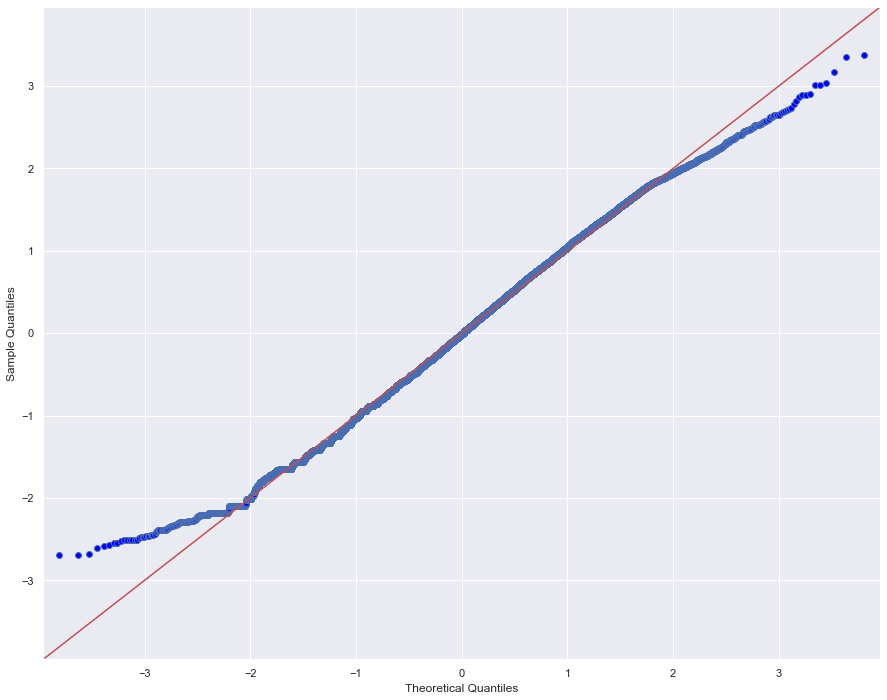

In [151]:
residuals = model_9.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [152]:
y = df_merged[['Global_Sales_log']]
X = df_merged[['Genre_Adventure', 'Total_Score', 'PC', 'Genre_Puzzle', 'Genre_Shooter', 'Genre_Strategy', 'Microsoft', 'Genre_Misc', 'Total_Engagement', 'Sony', 'Genre_Platform', 'Genre_Sports']]
X.head()

,Genre_Adventure,Total_Score,PC,Genre_Puzzle,Genre_Shooter,Genre_Strategy,Microsoft,Genre_Misc,Total_Engagement,Sony,Genre_Platform,Genre_Sports
350,0,1.632135,0,0,0,0,0,0,2.297301,1,0,0
351,0,0.921787,0,0,0,0,0,1,-0.691274,0,0,0
352,0,1.088650,0,0,0,0,0,0,1.494097,1,0,1
353,0,1.111213,0,0,1,0,0,0,0.684012,1,0,0
355,0,0.081295,0,0,0,0,0,0,-1.026245,1,0,0


In [153]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [154]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure     0
Total_Score         0
PC                  0
Genre_Puzzle        0
Genre_Shooter       0
Genre_Strategy      0
Microsoft           0
Genre_Misc          0
Total_Engagement    0
Sony                0
Genre_Platform      0
Genre_Sports        0
dtype: int64

In [155]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [157]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [158]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [159]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.01758489]
 [ 0.01758489]
 [-0.6402483 ]
 ...
 [ 0.24015577]
 [ 0.57136838]
 [ 0.53010083]]


In [160]:
r2_score(y_test,y_pred)

0.11631619189777309

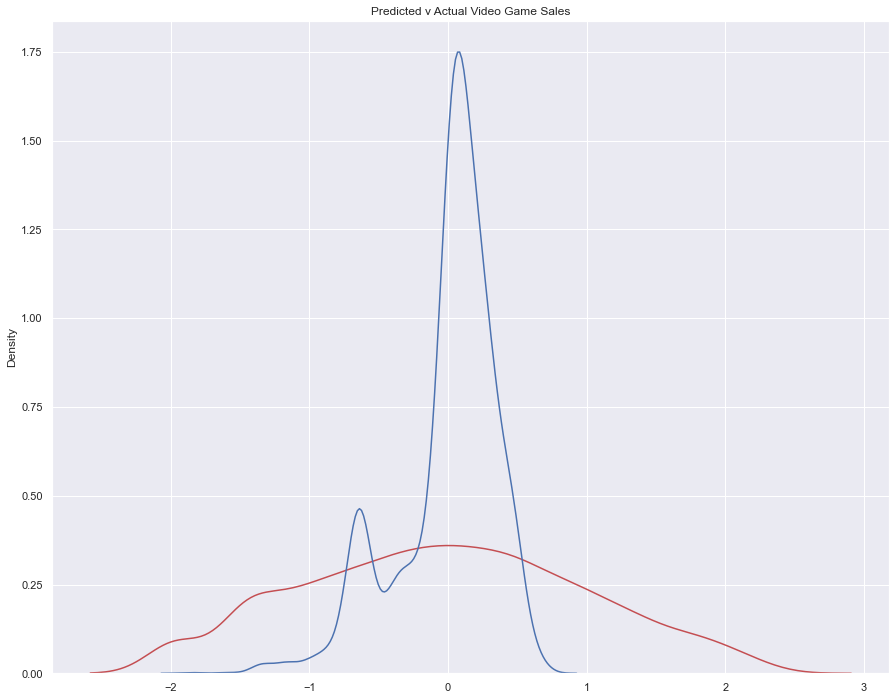

In [161]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

As OLS modelling did not provide any great results, I ran through polynomial regression modelling and just like OLS saw not meaningful results.

In [162]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
350,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.297301,1.632135
351,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.691274,0.921787
352,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1.494097,1.088650
353,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.684012,1.111213
355,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.026245,0.081295


In [163]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [164]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role_Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
Nintendo              0
Sony                  0
Microsoft             0
Sega                  0
PC                    0
Total_Engagement      0
Total_Score           0
dtype: int64

In [165]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [167]:
colors = ['green', 'blue']

for index, degree in enumerate([1, 2, 3]):
    
    # Instantiate PolynomialFeatures
    poly = PolynomialFeatures(degree)
    
    # Fit and transform X_train
    X_poly_train = poly.fit_transform(X_train)
    
    # Instantiate and fit a linear regression model to the polynomial transformed train features
    reg_poly = LinearRegression().fit(X_poly_train, y_train)
    
    # Transform the test data into polynomial features
    X_poly_test = poly.transform(X_test)
    
    # Get predicted values for transformed polynomial test data  
    y_pred = reg_poly.predict(X_poly_test)
    
    # Evaluate model performance on test data
    print("degree %d" % degree, r2_score(y_test, y_pred))
    
    # Transform the full data
    X_poly = poly.transform(X)

degree 1 0.11590626167741713
degree 2 0.2108202569281835
degree 3 -8.017074776869603e+20


I used the OLS models to run the train/test MSE graphs and the results can be found below.

In [168]:
all_cols = df_merged1.columns[1:41]

In [169]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_10 = smf.ols(formula=f, data=df_merged1).fit()
    print(model_10.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     145.7
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:24   Log-Likelihood:                -17811.
No. Observations:               14166   AIC:                         3.570e+04
Df Residuals:                   14128   BIC:                         3.598e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -9

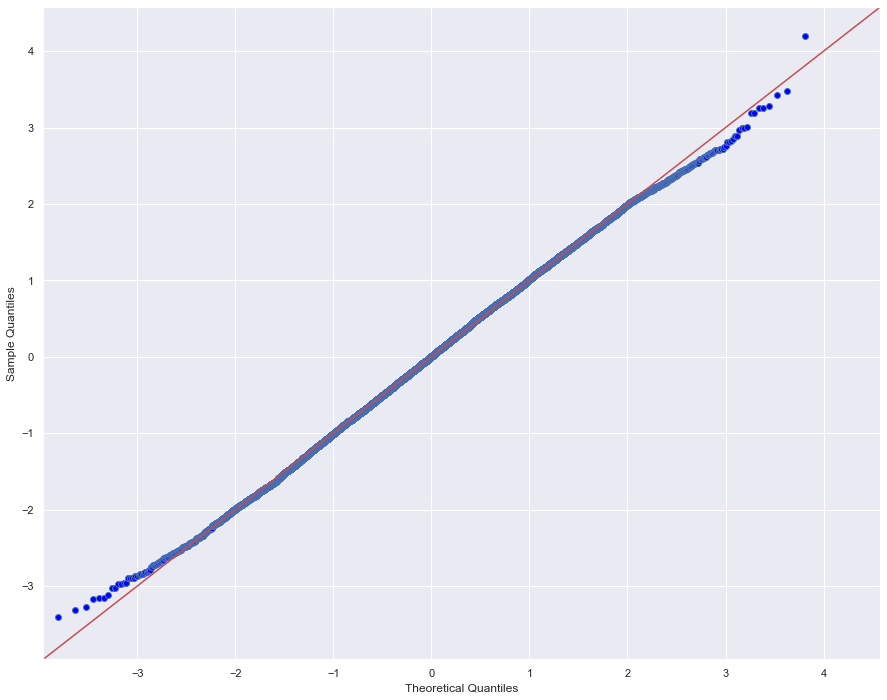

In [170]:
residuals = model_10.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [171]:
y = df_merged1[['Global_Sales_log']]
X = df_merged1.drop(['Global_Sales_log','Nintendo','Sony','Microsoft','Sega','PC'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,...,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
350,-0.734710,2.078818,0.100262,1.185452,2.197039,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
351,-0.004079,1.429224,-0.793370,0.414350,0.102096,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
352,0.239222,1.762949,0.564010,0.414350,0.930087,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
353,-0.978497,1.147964,0.035600,1.074461,0.648412,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
355,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [172]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [173]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Platform_3DS               0
Platform_DC                0
Platform_DS                0
Platform_GB                0
Platform_GBA               0
Platform_GC                0
Platform_N64               0
Platform_PC                0
Platform_PS                0
Platform_PS2               0
Platform_PS3               0
Platform_PS4               0
Platform_PSP               0
Platform_PSV               0
Platform_WS                0
Platform_Wii               0
Platform_WiiU              0
Platform_X360              0
Platform_XB                0
Platform_XOne              0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulati

In [174]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [176]:
linreg = LinearRegression()

In [177]:
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [178]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [179]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.7249198215526875
Test Mean Squarred Error: 0.7567093979631659


In [180]:
def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(df_merged1)
    num_observations = len(df_merged1)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [181]:
df_merged1 = pd.concat([X.reset_index(drop=True), y], axis=1)

In [182]:
df_folds = kfolds(df_merged1, 5)

In [183]:
test_errs = []
train_errs = []
k=5

for n in range(k):
        train = pd.concat([fold for i, fold in enumerate(df_folds) if i!=n])
        test = df_folds[n]
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
        train_errs.append(np.mean(train_residuals.astype(float)**2))
        test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[Global_Sales_log    0.72492
dtype: float64, Global_Sales_log    0.72492
dtype: float64, Global_Sales_log    0.72492
dtype: float64, Global_Sales_log    0.72492
dtype: float64, Global_Sales_log    0.72492
dtype: float64]
[Global_Sales_log    0.756709
dtype: float64, Global_Sales_log    0.756709
dtype: float64, Global_Sales_log    0.756709
dtype: float64, Global_Sales_log    0.756709
dtype: float64, Global_Sales_log    0.756709
dtype: float64]


In [184]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [185]:
cv_5_results.mean()

1.227907178799373

In [186]:
regression = LinearRegression()

In [187]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.26073520022525354

In [188]:
regression = LinearRegression()

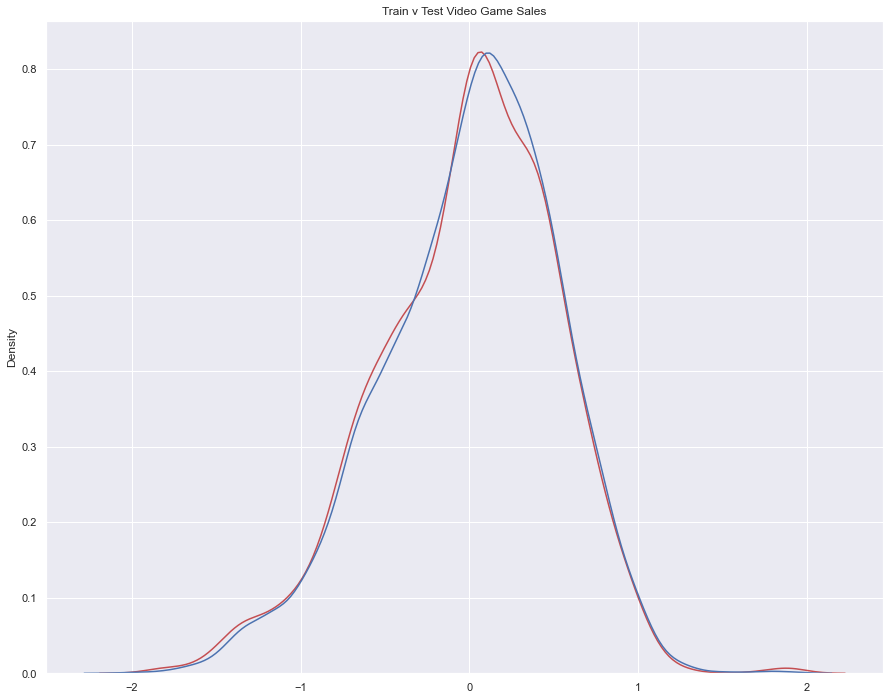

In [189]:
plt.title("Train v Test Video Game Sales")
ax1=sns.distplot(y_hat_test, color='r', hist=False)
sns.distplot(y_hat_train, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(12,10)})
plt.savefig('trainvtest1.png')
plt.show()

In [190]:
y = df_merged1[['Global_Sales_log']]
X = df_merged1.drop(['Global_Sales_log','Platform_3DS','Platform_DC','Platform_DS','Platform_GB','Platform_GBA','Platform_GC','Platform_N64',
                    'Platform_PC','Platform_PC','Platform_PS','Platform_PS2','Platform_PS3','Platform_PS4','Platform_PSP',
                    'Platform_PSV','Platform_WS','Platform_Wii','Platform_WiiU','Platform_X360','Platform_XB','Platform_XOne'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,Critic_Count_log,User_Score_log,User_Count_log,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Publisher_Lge_Publisher,Publisher_Med_Publisher,Publisher_Sml_Publisher
0,-0.734710,2.078818,0.100262,1.185452,2.197039,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.004079,1.429224,-0.793370,0.414350,0.102096,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.239222,1.762949,0.564010,0.414350,0.930087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.978497,1.147964,0.035600,1.074461,0.648412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.710588,-0.315596,-0.500215,0.478187,-0.526030,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [191]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log        0
Critic_Score_log           0
Critic_Count_log           0
User_Score_log             0
User_Count_log             0
Genre_Action               0
Genre_Adventure            0
Genre_Fighting             0
Genre_Misc                 0
Genre_Platform             0
Genre_Puzzle               0
Genre_Racing               0
Genre_Role_Playing         0
Genre_Shooter              0
Genre_Simulation           0
Genre_Sports               0
Genre_Strategy             0
Publisher_Lge_Publisher    0
Publisher_Med_Publisher    0
Publisher_Sml_Publisher    0
dtype: int64

In [192]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [194]:
linreg = LinearRegression()

In [195]:
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [196]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [197]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.802480226178423
Test Mean Squarred Error: 0.8239925354721807


In [198]:
def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(df_merged1)
    num_observations = len(df_merged1)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [199]:
df_merged1 = pd.concat([X.reset_index(drop=True), y], axis=1)

In [200]:
df_folds = kfolds(df_merged1, 5)

In [201]:
test_errs = []
train_errs = []
k=5

for n in range(k):
        train = pd.concat([fold for i, fold in enumerate(df_folds) if i!=n])
        test = df_folds[n]
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
        train_errs.append(np.mean(train_residuals.astype(float)**2))
        test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[Global_Sales_log    0.80248
dtype: float64, Global_Sales_log    0.80248
dtype: float64, Global_Sales_log    0.80248
dtype: float64, Global_Sales_log    0.80248
dtype: float64, Global_Sales_log    0.80248
dtype: float64]
[Global_Sales_log    0.823993
dtype: float64, Global_Sales_log    0.823993
dtype: float64, Global_Sales_log    0.823993
dtype: float64, Global_Sales_log    0.823993
dtype: float64, Global_Sales_log    0.823993
dtype: float64]


In [202]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [203]:
cv_5_results.mean()

1.3475330757336503

In [204]:
regression = LinearRegression()

In [205]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.19057274251177053

In [206]:
regression = LinearRegression()

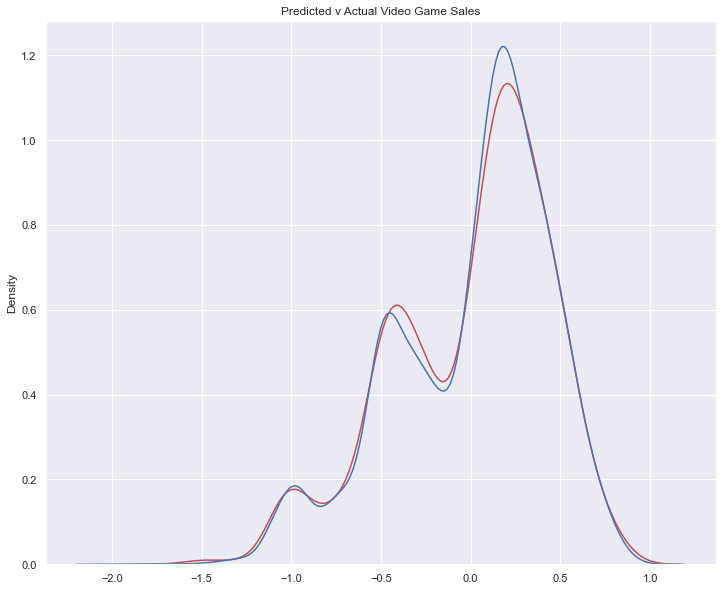

In [207]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_hat_test, color='r', hist=False)
sns.distplot(y_hat_train, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(12,10)})
plt.show()

In [208]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16551 entries, 0 to 16718
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_of_Release_log      14166 non-null  float64
 1   Critic_Score_log         14166 non-null  float64
 2   Critic_Count_log         14166 non-null  float64
 3   User_Score_log           14166 non-null  float64
 4   User_Count_log           14166 non-null  float64
 5   Genre_Action             14166 non-null  float64
 6   Genre_Adventure          14166 non-null  float64
 7   Genre_Fighting           14166 non-null  float64
 8   Genre_Misc               14166 non-null  float64
 9   Genre_Platform           14166 non-null  float64
 10  Genre_Puzzle             14166 non-null  float64
 11  Genre_Racing             14166 non-null  float64
 12  Genre_Role_Playing       14166 non-null  float64
 13  Genre_Shooter            14166 non-null  float64
 14  Genre_Simulation      

In [209]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14167 entries, 350 to 16718
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Global_Sales_log    14166 non-null  float64
 1   Genre_Adventure     14167 non-null  uint8  
 2   Genre_Fighting      14167 non-null  uint8  
 3   Genre_Misc          14167 non-null  uint8  
 4   Genre_Platform      14167 non-null  uint8  
 5   Genre_Puzzle        14167 non-null  uint8  
 6   Genre_Racing        14167 non-null  uint8  
 7   Genre_Role_Playing  14167 non-null  uint8  
 8   Genre_Shooter       14167 non-null  uint8  
 9   Genre_Simulation    14167 non-null  uint8  
 10  Genre_Sports        14167 non-null  uint8  
 11  Genre_Strategy      14167 non-null  uint8  
 12  Nintendo            14167 non-null  uint8  
 13  Sony                14167 non-null  uint8  
 14  Microsoft           14167 non-null  uint8  
 15  Sega                14167 non-null  uint8  
 16  PC

In [210]:
all_cols = df_merged.columns[1:19]

In [211]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_11 = smf.ols(formula=f, data=df_merged).fit()
    print(model_11.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     113.0
Date:                Tue, 21 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:07:27   Log-Likelihood:                -19198.
No. Observations:               14166   AIC:                         3.843e+04
Df Residuals:                   14148   BIC:                         3.857e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.545e+12   8.14

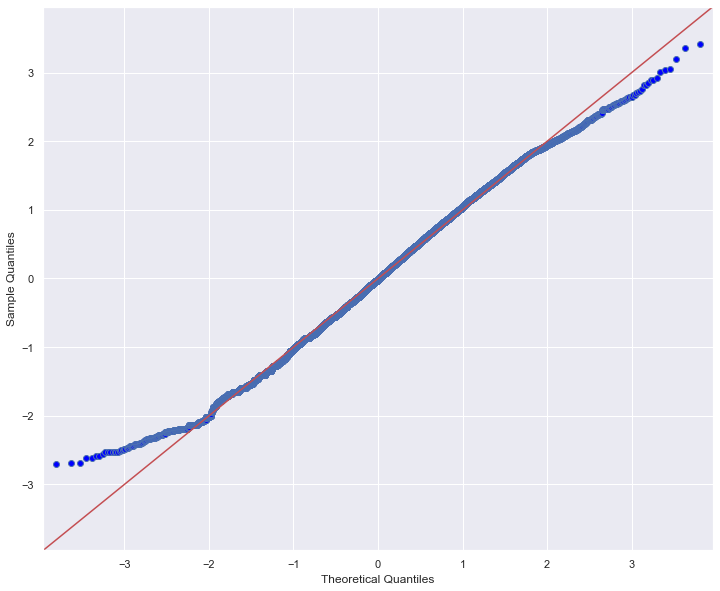

In [212]:
residuals = model_11.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [213]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role_Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Nintendo,Sony,Microsoft,Sega,PC,Total_Engagement,Total_Score
350,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2.297301,1.632135
351,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.691274,0.921787
352,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1.494097,1.088650
353,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.684012,1.111213
355,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,-1.026245,0.081295


In [214]:
y.head()

,Global_Sales_log
350,2.310730
351,2.310730
352,2.310730
353,2.308723
355,2.308723


In [215]:
X = X.dropna()
X.isnull().sum()

Genre_Adventure       0
Genre_Fighting        0
Genre_Misc            0
Genre_Platform        0
Genre_Puzzle          0
Genre_Racing          0
Genre_Role_Playing    0
Genre_Shooter         0
Genre_Simulation      0
Genre_Sports          0
Genre_Strategy        0
Nintendo              0
Sony                  0
Microsoft             0
Sega                  0
PC                    0
Total_Engagement      0
Total_Score           0
dtype: int64

In [216]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [218]:
linreg = LinearRegression()

In [219]:
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [220]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [221]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.8755969034712064
Test Mean Squarred Error: 0.8950543326876943


In [222]:
def kfolds(data, k):
    # Force data as pandas DataFrame
    data = pd.DataFrame(df_merged1)
    num_observations = len(df_merged1)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size
            
    return folds 

In [223]:
df_merged = pd.concat([X.reset_index(drop=True), y], axis=1)

In [224]:
df_folds = kfolds(df_merged, 5)

In [225]:
test_errs = []
train_errs = []
k=5

for n in range(k):
        train = pd.concat([fold for i, fold in enumerate(df_folds) if i!=n])
        test = df_folds[n]
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
        train_errs.append(np.mean(train_residuals.astype(float)**2))
        test_errs.append(np.mean(test_residuals.astype(float)**2))
print(train_errs)
print(test_errs)

[Global_Sales_log    0.875597
dtype: float64, Global_Sales_log    0.875597
dtype: float64, Global_Sales_log    0.875597
dtype: float64, Global_Sales_log    0.875597
dtype: float64, Global_Sales_log    0.875597
dtype: float64]
[Global_Sales_log    0.895054
dtype: float64, Global_Sales_log    0.895054
dtype: float64, Global_Sales_log    0.895054
dtype: float64, Global_Sales_log    0.895054
dtype: float64, Global_Sales_log    0.895054
dtype: float64]


In [226]:
mse = make_scorer(mean_squared_error)

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

In [227]:
cv_5_results.mean()

1.4455062214027858

In [228]:
regression = LinearRegression()

In [229]:
crossvalidation = KFold(n_splits=5, shuffle=True, random_state=1)
baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))

baseline

0.11632135671580449

In [230]:
regression = LinearRegression()

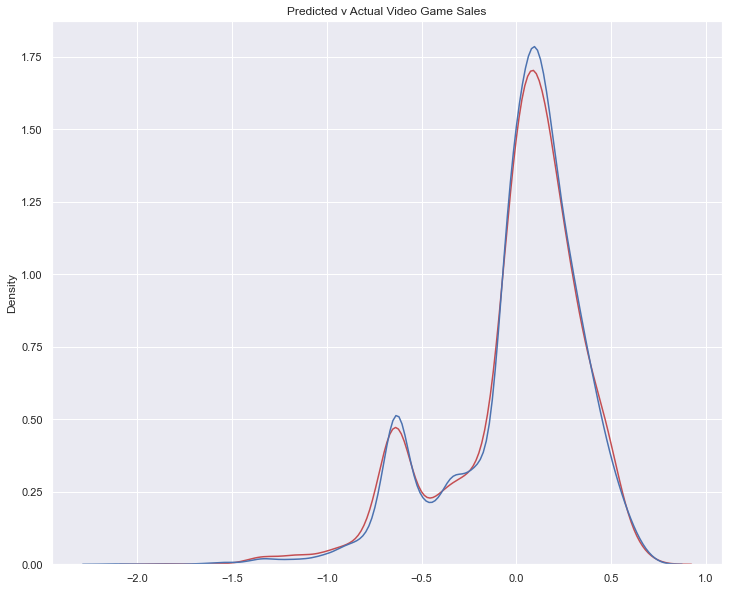

In [231]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_hat_test, color='r', hist=False)
sns.distplot(y_hat_train, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(12,10)})
plt.show()